 # Midterm Exam - Gaussian Processes
 
 ## Course: Machine Learning
 
 ## Semester: Fall 1403

![students](./pic/students.jpg)
 

## **Authors**  
This document was prepared by:  
- Mahdieh Alizadeh  
- Mehrnoosh Ziaei  
- Behzad Sabeti
- Payam Parvazmanesh
- Poorya Fekri
- Erfan fakoor 
 
Special thanks to the Machine Learning professor **Dr. Hadi Sadoghi Yazdi** for his guidance and contributions.



## 1. **Model Setup**

We model the relationship between the observed outputs $( y_i )$ and input vectors $( x_i )$ with a linear function:

$$
y_i = w^\top x_i + \epsilon_i,
$$
where:
- $( y_i )$ is the observed output for the $( i )-th$ data point.
- $( x_i \in \mathbb{R}^d )$ is the input vector for the $( i )-th$ data point, where $( d )$ is the number of features.
- $( w \in \mathbb{R}^d )$ is the weight vector (unknown parameters).
- $( \epsilon_i \sim \mathcal{N}(0, \sigma^2) )$ is Gaussian noise with mean 0 and variance $( \sigma^2 )$.

The dataset consists of $( n )$ independent observations $( \{(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)\} )$.



## 2. **Prior Distribution on Weights**

We assume a **Gaussian prior** on the weight vector $( w )$, which expresses our belief about the weights before seeing any data. The prior is given by:

$$
p(w) = \mathcal{N}(0, \Sigma_p),
$$
where:
- $( \Sigma_w \in \mathbb{R}^{d \times d} )$ is the covariance matrix of the prior distribution on $( w )$. This can be chosen based on prior knowledge about the weights or set as $( \Sigma_p = \lambda I )$, where $( I )$ is the identity matrix and $( \lambda > 0 )$ is a regularization parameter.



## 3. **Likelihood Function**

The likelihood of the observed data $( y = [y_1, y_2, \dots, y_n]^\top )$ given the inputs $( X = [x_1^\top, x_2^\top, \dots, x_n^\top]^\top )$ and weights $( w )$ is:

   $$
   p(y|X,w) = \prod_{i=1}^n p(y_i|x_i, w) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2_n}} \exp\left( -\frac{(y_i - w^\top x_i)^2}{2\sigma^2_n} \right)
   $$


   $$
   = \frac{1}{(2\pi\sigma^2_n)^{n/2}} \exp\left( -\frac{1}{2\sigma^2_n} \|y - w^\top X\|^2 \right)
   $$


   $$
   p(y|X,w)=\mathcal{N}(w^\top X, \sigma^2)
   $$
   
where:
   - $ y $ is the vector of observed target values.
   - $ X $ is the matrix of input vectors.
   - $ \sigma^2_n $ is the variance of the noise.
   - The likelihood $ p(y|X,w) $ represents the probability of observing $ y $ given $ X $ and $ w $.



## 4. **Posterior Distribution of Weights** (**Training Phase**)

Using **Bayes’ rule**, the posterior distribution of $( w )$ given the data $( X )$ and $( y )$ is:

   $$
   p(w|y,X) = \frac{p(y|X,w) p(w)}{p(y|X)}
   $$

As we want to calculate $p(w|y,X)$ We can assume $p(y|X)$ is a constant and this term is absorbed in the proportion.
   $$
   p(w|y,X) \propto p(y|X,w)*p(w)
   $$

As we know from prior that $w \sim \mathcal{N}(0, \Sigma_p)$, so $p(w|y,X) \propto \exp\left( -\frac{1}{2} w^\top \Sigma_p^{-1} w \right) $

and also we have $y = x^\top w + \epsilon$. So when we know $X,w$ then $y$  behaves like  $\epsilon$ shifting in accordance with $x^\top w$. It means that $y \sim \mathcal{N}(X^\top w, \sigma^2_n)$ Therefore, $p(y|X,w) \propto \exp\left( -\frac{1}{2\sigma^2_n} (y - X^\top w)^\top (y - X^\top w) \right)$

Therefore:

   $$
   p(w|X,y) \propto \exp\left( -\frac{1}{2\sigma^2_n} (y - w^\top X)^\top (y - w^\top X) \right) \exp\left( -\frac{1}{2} w^\top \Sigma_p^{-1} w \right)
   $$

### Step-by-Step Derivation of the Posterior Distribution

We start with the following expression for the posterior distribution of \( w \) given the data \( X \) and \( y \):

$$
p(w \mid X, y) \propto \exp\left( -\frac{1}{2\sigma^2_n} (y - w^\top X)^\top (y - w^\top X) \right) \exp\left( -\frac{1}{2} w^\top \Sigma_p^{-1} w \right)
$$

### **Step 0: What is the product of two Gaussian distributions?**
In the link below we can see the answer:

[Ploting the product of two Gaussian distributions](https://www.desmos.com/calculator/qtua9ikyhc)

It's interesting to look at how the new mean and the covariance is computed. New mean is actually weighted average of the old means weighted by the opposite covariances. Let's assume that the distribution of $X_1$ is skinny and has low variance compared to the distribution of $X_2$. The second Gaussian here has a very large covariance so it's a very broad and very wide uncertain distribution. Whereas $X_1$ is really narrow and has a very small covariance, so the random variable $X_1$ has much less uncertainty than random variable $X_2$. Then the result of the intersection will be strongly influenced by $\mu_1$, so by the first random variable $X_1$ because $Σ_2$ is large and $Σ_1$ is relatively small. In same manner the influence of $µ_2$ will be relatively limited. 

New covariance is essentially the inverse of the sum of the individual covariance inverses. The new variance $\sigma_2$ is twice the harmonic mean of the individual variances.

In short it means that the product of two gaussians PDFs g1(x) and g2(x) is a scaled gaussian PDF. Also the uncertainty shrinks, so the covariance shrinks, so if you combine two Gaussians then the result will be narrower and more certain than the original covariances. And the mean of the new distribution would be proportionately closer to the skinnier distribution. 

### **Step 1: Combine the Exponentials**

We combine the two exponential terms from the likelihood and prior:

$$
p(w \mid X, y) \propto \exp\left( -\frac{1}{2\sigma^2_n} (y - w^\top X)^\top (y - w^\top X) - \frac{1}{2} w^\top \Sigma_p^{-1} w \right)
$$

Now we expand the quadratic terms inside the exponent.



### **Step 2: Expand the Quadratic Terms**

#### First Term: $( (y - w^\top X)^\top (y - w^\top X) )$

We expand the first quadratic term as follows:

$$
(y - w^\top X)^\top (y - w^\top X) = y^\top y - 2 y^\top w^\top X + w^\top X^\top X w
$$

Thus, the first term in the exponent becomes:

$$
-\frac{1}{2\sigma^2_n} \left( y^\top y - 2 y^\top w^\top X + w^\top X^\top X w \right)
$$

#### Second Term: $( -\frac{1}{2} w^\top \Sigma_p^{-1} w )$

This term remains unchanged:

$$
-\frac{1}{2} w^\top \Sigma_p^{-1} w
$$



### **Step 3: Combine All Terms**

Now, we combine the expanded terms:

$$
p(w \mid X, y) \propto \exp\left( -\frac{1}{2\sigma^2_n} y^\top y + \frac{1}{\sigma^2_n} y^\top w^\top X - \frac{1}{2\sigma^2_n} w^\top X^\top X w - \frac{1}{2} w^\top \Sigma_p^{-1} w \right)
$$

Since $( y^\top y )$ is independent of $( w )$, we can ignore this constant term, and the expression simplifies to:

$$
p(w \mid X, y) \propto \exp\left( \frac{1}{\sigma^2_n} y^\top w^\top X - \frac{1}{2\sigma^2_n} w^\top X^\top X w - \frac{1}{2} w^\top \Sigma_p^{-1} w \right)
$$



### **Step 4: Complete the Square**

Given the expression:

$$
p(w \mid X, y) \propto \exp\left( \frac{1}{\sigma^2_n} y^\top w^\top X - \frac{1}{2\sigma^2_n} w^\top X^\top X w - \frac{1}{2} w^\top \Sigma_p^{-1} w \right)
$$

This expression is quadratic in $(w)$, representing a Gaussian distribution. Therefore: 

1. The **first derivative** with respect to $( w )$ gives the critical point, which corresponds to the mean (MAP estimate) of the Gaussian.  
2. The **second derivative** (Hessian) determines the curvature, and its negative inverse provides the covariance matrix of the posterior distribution.

#### First Derivative (Gradient)

Let $(f(w))$ denote the exponent of the posterior:

$$
f(w) = \frac{1}{\sigma^2_n} y^\top w^\top X - \frac{1}{2\sigma^2_n} w^\top X^\top X w - \frac{1}{2} w^\top \Sigma_p^{-1} w
$$

The gradient $( \nabla_w f(w))$ is:

$$
\nabla_w f(w) = \frac{\partial}{\partial w} \left( \frac{1}{\sigma^2_n} y^\top w^\top X - \frac{1}{2\sigma^2_n} w^\top X^\top X w - \frac{1}{2} w^\top \Sigma_p^{-1} w \right)
$$

Differentiating each term:

1. For the first term:

$$
\frac{\partial}{\partial w} \left( \frac{1}{\sigma^2_n} y^\top w^\top X \right) = \frac{1}{\sigma^2_n} X^\top y
$$

2. For the second term:

$$
\frac{\partial}{\partial w} \left( -\frac{1}{2\sigma^2_n} w^\top X^\top X w \right) = -\frac{1}{\sigma^2_n} X^\top X w
$$

3. For the third term:

$$
\frac{\partial}{\partial w} \left( -\frac{1}{2} w^\top \Sigma_p^{-1} w \right) = -\Sigma_p^{-1} w
$$

Combining these results:

$$
\nabla_w f(w) = \frac{1}{\sigma^2_n} X^\top y - \frac{1}{\sigma^2_n} X^\top X w - \Sigma_p^{-1} w
$$

Setting the gradient to zero to find the critical point $( \bar{w})$:

$$
\frac{1}{\sigma^2_n} X^\top y - \left( \frac{1}{\sigma^2_n} X^\top X + \Sigma_p^{-1} \right) \bar{w} = 0
$$

Solving for $(\bar{w})$:

$$
\bar{w} = \left( \frac{1}{\sigma^2_n} X^\top X + \Sigma_p^{-1} \right)^{-1} \frac{1}{\sigma^2_n} X^\top y
$$

#### Second Derivative (Hessian)

The Hessian matrix $(H)$ is the second derivative of $(f(w))$ with respect to $(w)$:

$$
\nabla_w^2 f(w) = \frac{\partial}{\partial w} \left( -\frac{1}{\sigma^2_n} X^\top X w - \Sigma_p^{-1} w \right)
$$

Therefore:

$$
H = -\left( \frac{1}{\sigma^2_n} X^\top X + \Sigma_p^{-1} \right)
$$

then as we said before:
$A=-(H^{-1})$

### **Step 5: Final Posterior Distribution**

Thus, the posterior distribution of $( w )$ is:

$$
p(w \mid X, y) = \mathcal{N}\left( \bar{w}, \left( \frac{1}{\sigma^2_n} X^\top X + \Sigma_p^{-1} \right)^{-1} \right)
$$

Where:
- The **posterior mean** $( \bar{w} )$ is:

$$
\bar{w} = \left( \frac{1}{\sigma^2_n} X^\top X + \Sigma_p^{-1} \right)^{-1} \frac{1}{\sigma^2_n} X^\top y
$$

- The **posterior covariance** $( A^{-1} )$ is:

$$
A^{-1} = \left( \frac{1}{\sigma^2_n} X^\top X + \Sigma_p^{-1} \right)^{-1}
$$



### **Summary of Key Formulas:**

- The **posterior distribution** is a Gaussian:

$$
p(w \mid X, y) = \mathcal{N}\left( \bar{w}, A^{-1} \right)
$$

- The **posterior mean** $( \bar{w} )$ is:

$$
\bar{w} = \left( \frac{1}{\sigma^2_n} X^\top X + \Sigma_p^{-1} \right)^{-1} \frac{1}{\sigma^2_n} X^\top y
$$

- The **posterior covariance** $( A^{-1} )$ is:

$$
A^{-1} = \left( \frac{1}{\sigma^2_n} X^\top X + \Sigma_p^{-1} \right)^{-1}
$$

- What do these mean and variance mean?

1. What we see in the mean formula means that the mean of the posterior distribution tends to the mean of our prior knowledge if the uncertainty of the training data is high or the number of data is small.
2. On the other hand, if the uncertainty of the training data is low or the number of data is large, the mean of the posterior distribution tends to the mean of the training data.
3. If we look closely, $y$ has appeared in the mean but not in the covariance. This means that the covariance and uncertainty we estimate are independent of the observed data, and this is one of the disadvantages of Gaussian processes.
4. The covariance of the posterior distribution depends only on prior knowledge and training data.
5. As we see in the covariance formula, if the uncertainty of the training data is large or the number of training data is small, the posterior distribution determines its uncertainty based on the uncertainty of the prior knowledge.
6. On the other hand, if the volume of training data is large enough or the uncertainty of the training data is low; the posterior distribution of uncertainty determines its uncertainty based on the uncertainty of the training data.

This concludes the derivation of the posterior distribution $( p(w \mid X, y) )$ with $( w^\top X )$ notation.

## 5. **Predictive Distribution of $( f_* )$**


To make predictions for a test case, we average over all possible parameter predictive distribution values, weighted by their posterior probability. This is in contrast to non-Bayesian schemes, where a single parameter is typically chosen by some criterion. Thus, the predictive distribution for $( f_* )$, $( f(x_*) )$ at $( x_* )$ is given by averaging the output of all possible linear models with respect to the Gaussian posterior:

$$
p(f_* \mid x_*, X, y) = \int p(f_* \mid x_*, w) p(w \mid X, y) \, dw.
$$



Since $( p(y_* \mid x_*, w) = \mathcal{N}( w^\top x_*, \sigma^2) )$, the predictive distribution is also Gaussian. The mean and variance of the predictive distribution can be computed as follows.

###  **Predictive mean of $( f_* )$**:

$$
\mathbb{E}[f_* \mid X,y,x_*] 
$$



$$
\mathbb{E}[w^\top x_* \mid X,y,x_*] 
$$



$$
\mathbb{E}[x_*^\top w \mid X,y,x_*] 
$$

$$
x_*^\top \mathbb{E}[ w \mid X,y]
$$

$$
x_*^\top \bar{w}
$$


$$
\text{mean}(f_*) = x_*^\top(\left( \frac{1}{\sigma^2_n} X^\top X + \Sigma_p^{-1} \right)^{-1} \frac{1}{\sigma^2_n} X^\top y)
$$

###  **Predictive Variance of $( f_* )$**



$$
\text{Var}(f_*) = \mathbb{E}[ (f_* - \mathbb{E}[f_* \mid X,y,x_*])^2 \mid X,y,x_* ]
$$


$$
\mathbb{E}[ (w^\top x_* - \bar{w}^\top x_*)^2 \mid X,y,x_*]
$$

$$
\mathbb{E}[((w- \bar{w})^\top x_*)^2 \mid X,y,x_*]
$$

$$
\mathbb{E}[x_*^\top (w-\bar{w})(w-\bar{w})^\top x_* \mid X,y,x_*]
$$

$$
x_*^\top \mathbb{E}[ (w-\bar{w})(w-\bar{w})^\top \mid X,y] x_*
$$

$$
\text{Var}(f_*) = x_*^\top A^{-1} x_*
$$




## 6. **Final Predictive Distribution**

The predictive distribution for $( f_* )$ is therefore:

$$
f_* \mid x_*, X, y \sim \mathcal{N}(\mu_*, \sigma_*^2),
$$
where:
- The **predictive mean** is:

$$
\mu_* = x_*^\top A^{-1} \left( \frac{1}{\sigma^2} X^\top y \right),
$$

- The **predictive variance** is:

$$
\sigma_*^2 = x_*^\top A^{-1} x_* 
$$

## Summary of Key Formulas:

- **Prior**: $ p(w) = \mathcal{N}(0, \Sigma_p) $
- **Likelihood**: $ p(y \mid X, w) = \mathcal{N}( w^\top X, \sigma^2) $
- **Posterior**: $ p(w \mid X, y) = \mathcal{N}(\bar{w}, A^{-1}) $
 

 - $ \bar{w} = A^{-1} \left( \frac{1}{\sigma^2} X^\top y \right) $
  - $ A^{-1} = \left( \Sigma_p^{-1} + \frac{1}{\sigma^2} X^\top X \right)^{-1} $
- **Predictive Mean**: $\mu_* = x_*^\top A^{-1} \left( \frac{1}{\sigma^2} X^\top y \right)$
- **Predictive Variance**: $\sigma_*^2 = x_*^\top A^{-1} x_*$



#  Handle High-Dimensional and Kernels
Given the formula for the posterior distribution of the function values $ f_* $ at a test point $ x_* $:

$$
f_* | x_*, X, y \sim \mathcal{N}\left( \frac{1}{\sigma^2_n} \phi(x_*)^\top A^{-1} \phi^\top y, \phi(x_*)^\top A^{-1} \phi(x_*) \right)
$$

Where:
- $ \phi(x_*) $ is the feature map of the test point $ x_* $,
- $ \Phi = [\phi(x_1), \phi(x_2), ..., \phi(x_N)] $ is the matrix of feature maps for the training data,
- $ A = \sigma_n^{-2} \Phi \Phi^\top + \Sigma_p^{-1} $ is the precision matrix, combining the noise precision and the prior precision.

We wish to express this in terms of **kernels** because of several reasons:
Kernels are used in various contexts, particularly when working with models that need to operate in high-dimensional or complex input spaces. Here's a breakdown of when and why you should use kernels:

## When to Use Kernels in Gaussian Processes?
Kernels (also known as covariance functions) play a crucial role in Gaussian Processes (GP), which are non-parametric models used for regression and classification tasks. In GP, kernels define the covariance structure of the underlying function you're trying to model. Here’s why and when kernels are used in Gaussian Processes:

### 1. **To Define the Covariance Between Data Points**
- The kernel defines the covariance between any two points in the input space. This is central to Gaussian Processes because GPs assume that any set of function values has a joint Gaussian distribution, and the covariance matrix is defined by the kernel.
- **Example**: If you have input points $ X $ and want to predict the function value at a new point $ x_* $, the kernel specifies how similar or correlated $ x_* $ is to the training points $ X $.

### 2. **To Encode Assumptions About the Function Being Modeled**
- Kernels allow you to express assumptions about the properties of the underlying function, such as smoothness, periodicity, or noise levels.
  - **Smoothness**: The function may be assumed to be continuous and differentiable (e.g., using the RBF kernel).
  - **Periodicity**: You may assume that the function repeats itself over time (e.g., using periodic kernels).
  - **Noise**: Kernels can also model the noise in the data (e.g., adding a noise kernel to account for measurement errors).
- **Example**: In GP regression, the choice of kernel controls the smoothness of the predicted function and how strongly the model relies on nearby data points.

### 3. **To Model Nonlinear Relationships**
- Kernels are particularly useful when the relationship between the input variables and the output is nonlinear. By using a kernel function, the GP model can implicitly map the data into a higher-dimensional space, enabling it to model complex, nonlinear relationships without explicitly transforming the data.
- **Example**: The Radial Basis Function (RBF) kernel (also known as the Gaussian kernel) is widely used to capture smooth, nonlinear relationships in the data. It allows the GP to make accurate predictions for nonlinear functions, such as those found in time series or spatial data.

### 4. **To Incorporate Prior Knowledge about the Data**
- In GP, the kernel can incorporate prior knowledge or domain expertise about the function you're modeling. For example, if you know the function has periodic behavior, you can use a periodic kernel.
- **Example**: If you're modeling temperature over time, a periodic kernel would encode the assumption that temperatures repeat with a certain period.

### 5. **To Express Uncertainty in Predictions**
- Gaussian Processes are probabilistic models, and the kernel not only helps make predictions but also quantifies the uncertainty in those predictions. This is especially useful in settings where you need to understand the confidence in the model's output, such as in active learning or optimization tasks.
- **Example**: The variance predicted by the GP, derived from the kernel, quantifies the uncertainty in the model's prediction for a given input.

### 6. **To Handle High-Dimensional or Complex Input Spaces**
- Many problems, especially in machine learning and statistics, involve high-dimensional or complex data. Kernels provide a way to compute dot products in high-dimensional feature spaces efficiently (using the "kernel trick"), allowing Gaussian Processes to model data in these spaces without explicitly computing the higher-dimensional representation.
- **Example**: In spatial data, where each data point is associated with a location, kernels such as the squared exponential (RBF) kernel or Matérn kernel help model the spatial correlation of the data without the need to define an explicit transformation to higher dimensions.

### 7. **To Model Complex Data Structures**
- Kernels can be used to handle complex data types such as time series, images, or text. By using specialized kernels, GPs can model relationships that are difficult to capture with standard linear models.
- **Example**: In time series forecasting, a kernel that accounts for temporal correlations (such as a temporal RBF kernel) can be used to model how future values depend on past values in a continuous-time process.

### 8. **To Achieve Non-Parametric Flexibility**
- Gaussian Processes are non-parametric, meaning they do not assume a specific form for the function being modeled. Instead, the kernel function defines the space of possible functions. This non-parametric nature is particularly useful when you have little prior knowledge about the form of the function.
- **Example**: A GP with a properly chosen kernel can fit a wide range of functions, from smooth and continuous functions to those with more abrupt changes, without specifying a parametric model in advance.

### Summary of Why Kernels Are Essential in Gaussian Processes
- **Covariance modeling**: Kernels define how data points are related through their covariance, essential for GP.
- **Encoding assumptions**: Kernels allow you to express assumptions about the smoothness, periodicity, and other properties of the function.
- **Nonlinearity**: Kernels enable GPs to model complex, nonlinear relationships between inputs and outputs.
- **Prior knowledge**: Kernels provide a way to incorporate domain knowledge about the data.
- **Uncertainty quantification**: In GPs, kernels help quantify the uncertainty in predictions.
- **High-dimensional data**: Kernels allow GPs to efficiently handle high-dimensional input spaces.
- **Complex data**: Specialized kernels enable GPs to handle complex data structures, such as time series and spatial data.
- **Non-parametric flexibility**: GPs with kernels provide a flexible, non-parametric approach to modeling data.

### Common Kernel Functions Used in Gaussian Processes
- **Linear Kernel**: Suitable for modeling linear relationships.
- **Radial Basis Function (RBF) / Gaussian Kernel**: Captures smooth, continuous functions, widely used in GP regression.
- **Matérn Kernel**: More flexible than the RBF kernel, allowing for different degrees of smoothness.
- **Periodic Kernel**: Useful for modeling periodic functions, such as in time series with a repeating pattern.
- **Noise Kernel**: Adds a noise term to model observation noise in the data.

### Example of Kernel Functions in Gaussian Processes

The most commonly used kernel in Gaussian Processes is the **Radial Basis Function (RBF)** kernel, also known as the **Gaussian Kernel**, which is defined as:

$$
k(x, x') = \exp\left(-\frac{|x - x'|^2}{2 \sigma^2}\right)
$$

where $ \sigma $ is a hyperparameter that controls the smoothness of the function being modeled.

Another widely used kernel is the **Matérn Kernel**, which is defined as:

$$
k(x, x') = \frac{1}{\Gamma(\nu) 2^{\nu - 1}} \left(\frac{\sqrt{2 \nu} |x - x'|}{\ell}\right)^\nu K_\nu\left(\frac{\sqrt{2 \nu} |x - x'|}{\ell}\right)
$$

where $ \nu $ controls the smoothness, and $ \ell $ is the length scale parameter.

**Kernels** in Gaussian Processes allow for great flexibility and power, enabling models to capture complex, nonlinear relationships in the data while quantifying uncertainty in predictions.

## Apply Kernel Trick
For a GP, the covariance between the training points $ \mathbf{X} $ and test point $ \mathbf{x_*} $ is determined by the kernel function:

1. **Covariance matrix between training points**:
$$
K(\mathbf{X}, \mathbf{X}) = \Phi(\mathbf{X}) \Phi(\mathbf{X})^\top
$$
where $ \Phi(\mathbf{X}) $ is the feature map associated with the data points in $ \mathbf{X} $.

2. **Covariance between training and test points**:
$$
K(\mathbf{X}, \mathbf{x_*}) = \Phi(\mathbf{X}) \Phi(\mathbf{x_*})^\top
$$
where $ \Phi(\mathbf{x_*}) $ is the feature map for the test point $ \mathbf{x_*} $.

3. **Covariance matrix of the test points**:
$$
K(\mathbf{x_*}, \mathbf{x_*}) = \Phi(\mathbf{x_*}) \Phi(\mathbf{x_*})^\top
$$

By using the kernel trick, you don't need to explicitly compute $ \Phi(\mathbf{X}) $ or $ \Phi(\mathbf{x_*}) $. Instead, you calculate the kernel values directly, allowing the GP model to make predictions based on these kernel values without needing to transform the data.

### Step 1: Recall the prior and likelihood

The prior for the function values is a Gaussian process:

$$
f \sim \mathcal{N}(0, K)
$$

where $ K $ is the covariance matrix given by the kernel function $ k(x, x') = \phi(x)^\top \phi(x') $.

The likelihood is:

$$
y = f + \epsilon, \quad \epsilon \sim \mathcal{N}(0, \sigma_n^2 I)
$$

where $ y $ are the observed outputs, and $ \sigma_n^2 $ is the noise variance.

Given the matrix:

$$
A = \sigma_n^{-2} \Phi \Phi^\top + \Sigma_p^{-1}
$$

where:
- $ \sigma_n^2 $ is the variance of the noise,
- $ \Phi $ is the design matrix (which typically contains the features of the input data),
- $ \Sigma_p^{-1} $ is the prior covariance matrix (typically the inverse of the prior covariance matrix).

To compute $ A^{-1} $, we can use a known matrix identity for the inverse of a sum of two matrices:

$$
(A + B)^{-1} = A^{-1} - A^{-1} B (I + B A^{-1})^{-1} A^{-1}
$$

However, since $ A $ is a sum of two matrices where $ A = \sigma_n^{-2} \Phi \Phi^\top + \Sigma_p^{-1} $, we can apply the formula directly by noting the specific structure of $ A $.

Now, applying the **Woodbury matrix identity**, which is a generalization of the matrix inversion lemma. This identity is helpful when you have a matrix of the form $ A = U V^\top + C $, where $ U $ and $ V $ are matrices and $ C $ is another matrix.

The **Woodbury identity** states that:

$$
(A + U V^\top)^{-1} = A^{-1} - A^{-1} U (I + V^\top A^{-1} U)^{-1} V^\top A^{-1}
$$


**Proof:**

The **Woodbury matrix identity** is given by:

$$
(M + U V^\top)^{-1} = M^{-1} - M^{-1} U \left(I + V^\top M^{-1} U\right)^{-1} V^\top M^{-1}
$$

where:
- $ M $ is an $ m \times m $ invertible matrix,
- $ U $ is an $ m \times k $ matrix,
- $ V $ is a $ k \times m $ matrix,
- $ I $ is the identity matrix of size $ k \times k $.

**Start with the expression for the inverse**

Let $ B = M + U V^\top $, and suppose we want to find $ B^{-1} $, so that:

$$
B B^{-1} = I
$$

This means:

$$
(M + U V^\top)(B^{-1}) = I
$$

**Assume the form of the inverse**

We hypothesize that $ B^{-1} $ has the form:

$$
B^{-1} = M^{-1} - M^{-1} U X V^\top M^{-1}
$$

where $ X $ is to be determined.

**Substitute into the identity**

Now, substitute this assumption into the equation:

$$
(M + U V^\top)(M^{-1} - M^{-1} U X V^\top M^{-1}) = I
$$

**Expand the product**

Expanding the terms gives:

$$
M M^{-1} - M M^{-1} U X V^\top M^{-1} + U V^\top M^{-1} - U V^\top M^{-1} U X V^\top M^{-1}
$$

Simplifying:

$$
I - M^{-1} U X V^\top M^{-1} + U V^\top M^{-1} - U V^\top M^{-1} U X V^\top M^{-1}
$$

**Solve for $ X $**

In order to match the identity $ I $, we need to set the correction terms equal to zero. This gives the condition:

$$
X = (I + V^\top M^{-1} U)^{-1}
$$

**Final Expression for the Inverse**

Therefore, the inverse of $ M + U V^\top $ is:

$$
(M + U V^\top)^{-1} = M^{-1} - M^{-1} U \left(I + V^\top M^{-1} U\right)^{-1} V^\top M^{-1}
$$



In our case, $ A =\Sigma_p^{-1} + \sigma_n^{-2} \Phi \Phi^\top $, so we can apply the identity here:

$$
A^{-1} = \left( \Sigma_p^{-1} + \sigma_n^{-2} \Phi \Phi^\top \right)^{-1}
$$

Using the Woodbury identity, we have:

$$
A^{-1} = \Sigma_p - \Sigma_p \Phi \left( \sigma_n^2 + \Phi^\top \Sigma_p \Phi \right)^{-1} \Phi^\top \Sigma_p
$$

Thus, the inverse of $ A $ is:

$$
A^{-1} = \Sigma_p - \Sigma_p \Phi \left( \sigma_n^2 + \Phi^\top \Sigma_p \Phi \right)^{-1} \Phi^\top \Sigma_p
$$

This formula is crucial for solving for the posterior covariance in **Bayesian linear regression** or **Gaussian Process regression**, and involves the following components:
- $ \Sigma_p $ is the prior covariance matrix (usually known),
- $ \Phi $ is the design matrix (containing the features of your input data),
- $ \sigma_n^2 $ is the noise variance,
- The term $ \left( \sigma_n^2 + \Phi^\top \Sigma_p \Phi \right)^{-1} $ is a key part of the computation.



### Step 2: Posterior Distribution

The posterior distribution of $ f_* $ given $ X $ and $ y $ is:

$$
f_* | x_*, X, y \sim \mathcal{N}(\mu_*, \Sigma_*)
$$

where the posterior mean $ \mu_* $ and covariance $ \Sigma_* $ are:

- **Mean:**

$$
\mu_* = \frac{1}{\sigma_n^2} \phi(x_*)^\top A^{-1} \phi^\top y
$$

- **Variance:**

$$
\sigma_* = \phi(x_*)^\top A^{-1} \phi(x_*)
$$

### Step 3: Expressing in Kernel Form

Now, we will express these in terms of kernel functions.

#### 3.1 Posterior Mean in Kernel Form

The posterior mean $ \mu_* $ can be written as:

We start with the equation for $ A^{-1} $:

$$
A^{-1} = \Sigma_p - \Sigma_p \Phi \left( \sigma_n^2 + \Phi^\top \Sigma_p \Phi \right)^{-1} \Phi^\top \Sigma_p
$$

Substitute this expression into the formula for the posterior mean:

$$
\mu_* = \frac{1}{\sigma_n^2} \phi(x_*)^\top A^{-1} \phi^\top y
$$

Proof:

$$
\sigma_n^{-2} \phi^\top (K+\sigma^2I)
$$

As $K=\phi^\top\Sigma_p\phi$, we have:
$$
\sigma_n^{-2} \phi^\top (\phi^\top\Sigma_p\phi+\sigma^2I)
$$

$$
\sigma_n^{-2} \phi^\top \phi \Sigma_p \phi^\top+\phi^\top
$$

Then we factor $\Sigma_p \phi^\top$ from the right.
$$
(\sigma_n^{-2}\phi^\top\phi+\Sigma_p^{-1})\Sigma_p\phi^\top
$$

As $A=\sigma_n^{-2}\phi^\top\phi+\Sigma_p^{-1}$ then we have:

$$
\sigma_n^{-2}\phi^\top(K+\sigma^2I)=A\Sigma_p\phi^\top
$$

Now we multiply both side to $A^-1$

$$
\sigma_n^{-2}A^{-1}\phi^\top(K+\sigma^2I)=\Sigma_p\phi^\top
$$

Now we multiply both side from right to $(K+\sigma^2I)$

$$
\sigma_n^{-2}A^{-1}\phi^\top=\Sigma_p\phi^\top(K+\sigma^2I)^{-1}
$$

Then As we know that $\mu_*=\sigma_n^{-2}\phi^\top(x_*)A^{-1}\phi^\top y$, we have:

$$
\mu_*=\phi(x_*)^\top \Sigma_p \phi^\top (K+\sigma^2I)^{-1}y
$$

#### 3.2 Posterior Variance in Kernel Form

The posterior covariance $ \Sigma_* $ can be written as:
We start with the expression for the posterior covariance:

$$
\text{cov}(f_* | x_*, X, y) = K(x_*, x_*) - K(x_*, X)^\top A^{-1} K(X, x_*)
$$

Next, substitute the expression for $ A^{-1} $:

$$
A^{-1} = \Sigma_p - \Sigma_p \Phi \left( \sigma_n^2 + \Phi^\top \Sigma_p \Phi \right)^{-1} \Phi^\top \Sigma_p
$$

This gives:

$$
\text{cov}(f_* | x_*, X, y) = K(x_*, x_*) - K(x_*, X)^\top \left[ \Sigma_p - \Sigma_p \Phi \left( \sigma_n^2 + \Phi^\top \Sigma_p \Phi \right)^{-1} \Phi^\top \Sigma_p \right] K(X, x_*)
$$

Expanding the terms inside the brackets:

$$
\text{cov}(f_* | x_*, X, y) = K(x_*, x_*) - K(x_*, X)^\top \Sigma_p K(X, x_*) + K(x_*, X)^\top \Sigma_p \Phi \left( \sigma_n^2 + \Phi^\top \Sigma_p \Phi \right)^{-1} \Phi^\top \Sigma_p K(X, x_*)
$$

Now, express in terms of kernels:

$$
\text{cov}(f_* | x_*, X, y) = k(x_*, x_*) - k(x_*, X)^\top K(X, X)^{-1} k(X, x_*) + k(x_*, X)^\top K(X, X)^{-1} \left( \sigma_n^2 + k(X, X) \right)^{-1} K(X, X)^{-1} k(X, x_*)
$$

The final expression for the posterior covariance is:

$$
\text{cov}(f_* | x_*, X, y) = k(x_*, x_*) - k(x_*, X)^\top K(X, X)^{-1} k(X, x_*)
$$

### Final Result

Thus, the posterior mean and covariance are:

- **Mean:**

$$
\mu_* = k(x_*, X)^\top K(X, X)^{-1} y
$$

- **Covariance:**

$$
\Sigma_* = k(x_*, x_*) - k(x_*, X)^\top K(X, X)^{-1} k(X, x_*)
$$
**Final Formula:**

Thus, the final posterior distribution of $ f_* $ is:

$$
f_* | \mathbf{x_*}, \mathbf{X}, \mathbf{y} \sim \mathcal{N}\left( \phi_*^\top \Sigma_p \Phi (K + \sigma_n^2 I)^{-1} \mathbf{y}, \phi_*^\top \Sigma_p \phi_* - \phi_*^\top \Sigma_p \Phi (K + \sigma_n^2 I)^{-1} \Phi^\top \Sigma_p \phi_* \right)
$$

****Explanation of Key Components:****

- **Feature Map** $ \phi_* $ and $ \Phi $: The feature map $ \phi(\cdot) $ transforms the data into a higher-dimensional space, often infinite-dimensional, to capture the non-linearity of the data. In this equation, $ \phi_* $ refers to the feature map for the test point, and $ \Phi $ is the matrix of feature maps for the training data.
    
- **Prior Covariance** $ \Sigma_p $: This represents the prior belief about the function's behavior before seeing any data. It's typically chosen to reflect properties like smoothness or periodicity.
    
- **Kernel Matrix** $ K $: The kernel matrix captures the similarities between training points and is used to define the covariance between function values at those points. The kernel trick allows us to compute the similarities in the feature space without explicitly computing $ \phi(\cdot) $.
    
- **Noise** $ \sigma_n^2 $: The noise term accounts for the observational noise in the training data.




## Function-Space View (Non parametric) in Gaussian Processes

A **Gaussian Process (GP)** is a powerful and flexible approach for modeling and making predictions about functions. Instead of directly estimating a parameterized model (e.g., linear regression or neural networks), a GP defines a **distribution over functions**. This allows us to treat functions as random variables and make predictions with an associated uncertainty, rather than a single deterministic outcome. In essence, the GP framework enables us to work directly in the **function space** by providing a distribution over all possible functions that are consistent with the observed data.

In the **function-space view**, we consider the following key concepts:

#### 1. Prior Over Functions
Before observing any data, we assume that the function values at any collection of input points come from a multivariate Gaussian distribution. This is referred to as the **prior distribution** over functions. For a set of input points $( x_1, x_2, \dots, x_n )$, the values of the function at these points, denoted as $( f(x_1), f(x_2), \dots, f(x_n) )$, follow a joint Gaussian distribution with mean and covariance given by the following:

$$
\mathbf{f(x)} \sim \mathcal{GP}(\mathbf{m(x)}, \mathbf{K(x,x')})
$$


$$
\begin{bmatrix}
f(x_1) \\
f(x_2) \\
\vdots \\
f(x_n)
\end{bmatrix}
\sim \mathcal{N}\left(
\begin{bmatrix}
m(x_1) \\
m(x_2) \\
\vdots \\
m(x_n)
\end{bmatrix},
\begin{bmatrix}
K(x_1, x_1) & K(x_1, x_2) & \cdots & K(x_1, x_n) \\
K(x_2, x_1) & K(x_2, x_2) & \cdots & K(x_2, x_n) \\
\vdots & \vdots & \ddots & \vdots \\
K(x_n, x_1) & K(x_n, x_2) & \cdots & K(x_n, x_n)
\end{bmatrix}
\right)
$$




Where:
- **Mean vector** $(\mathbf{m} = [m(x_1), m(x_2), \dots, m(x_n)])$, typically assumed to be zero unless specified otherwise. The mean function represents the expected value of the function at each input point.

  
- **Covariance matrix** $(\mathbf{K})$, whose elements are computed by the kernel function $( k(x_i, x_j) )$. The kernel function defines how related the function values at different points are, i.e., it controls the smoothness, periodicity, and other properties of the function.

In a Gaussian Process, the kernel function is a crucial component that encodes the assumptions about the smoothness and variability of the underlying function. 

#### 2. Joint Normal Distribution

The **joint normal distribution** describes the behavior of a set of random variables $( X_1, X_2, \ldots, X_n )$ that are jointly Gaussian. This means every linear combination of these variables is also normally distributed. 

##### Definition

If $( \mathbf{X} = \begin{bmatrix} X_1 \\ X_2 \\ \vdots \\ X_n \end{bmatrix} )$ is an $( n )$-dimensional random vector, it follows a joint normal distribution if:

$$
\mathbf{X} \sim \mathcal{N}\left( 
\boldsymbol{\mu}, \mathbf{\Sigma}
\right),
$$

where:
- $( \boldsymbol{\mu} = \begin{bmatrix} \mu_1 \\ \mu_2 \\ \vdots \\ \mu_n \end{bmatrix} )$ is the mean vector.
- $( \mathbf{\Sigma} = \begin{bmatrix}
\sigma_{11} & \sigma_{12} & \cdots & \sigma_{1n} \\
\sigma_{21} & \sigma_{22} & \cdots & \sigma_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
\sigma_{n1} & \sigma_{n2} & \cdots & \sigma_{nn}
\end{bmatrix} )$ is the covariance matrix, where $( \sigma_{ij} = \text{Cov}(X_i, X_j) )$.

##### Joint PDF

The probability density function (PDF) is:

$$
f(\mathbf{X}) = \frac{1}{(2\pi)^{n/2} |\mathbf{\Sigma}|^{1/2}} 
\exp\left( -\frac{1}{2} (\mathbf{X} - \boldsymbol{\mu})^T \mathbf{\Sigma}^{-1} (\mathbf{X} - \boldsymbol{\mu}) \right),
$$

where:
- $( |\mathbf{\Sigma}| )$ is the determinant of the covariance matrix.
- $( \mathbf{\Sigma}^{-1} )$ is the inverse of the covariance matrix.
- $( (\mathbf{X} - \boldsymbol{\mu})^T \mathbf{\Sigma}^{-1} (\mathbf{X} - \boldsymbol{\mu}) )$ is the **Mahalanobis distance**. 

This distribution is used widely in multivariate statistics, machine learning, and Gaussian processes.

##### Marginal Distribution

The **marginal distribution** of a subset of a multivariate normal distribution is also a multivariate normal distribution. Suppose $\mathbf{X}$ is partitioned into two sets $\mathbf{X}_1$ and $\mathbf{X}_2$:

$$
\mathbf{X} = \begin{bmatrix} \mathbf{X}_1 \\ \mathbf{X}_2 \end{bmatrix}, \quad \boldsymbol{\mu} = \begin{bmatrix} \boldsymbol{\mu}_1 \\ \boldsymbol{\mu}_2 \end{bmatrix}, \quad \mathbf{\Sigma} = \begin{bmatrix} \mathbf{\Sigma}_{11} & \mathbf{\Sigma}_{12} \\ \mathbf{\Sigma}_{21} & \mathbf{\Sigma}_{22} \end{bmatrix}
$$

Then the marginal distribution of $\mathbf{X}_1$ is:

$$
\mathbf{X}_1 \sim \mathcal{N}(\boldsymbol{\mu}_1, \mathbf{\Sigma}_{11})
$$

##### Conditional Distribution

The **conditional distribution** of one subset of a multivariate normal distribution given another subset is also a multivariate normal distribution. Suppose $\mathbf{X}$ is partitioned as above. The conditional distribution of $\mathbf{X}_1$ given $\mathbf{X}_2 = \mathbf{x}_2$ is:

$$
\mathbf{X}_1 | \mathbf{X}_2 = \mathbf{x}_2 \sim \mathcal{N}(\boldsymbol{\mu}_{1|2}, \mathbf{\Sigma}_{1|2}),
$$

where:
- $\boldsymbol{\mu}_{1|2} = \boldsymbol{\mu}_1 + \mathbf{\Sigma}_{12}\mathbf{\Sigma}_{22}^{-1} (\mathbf{x}_2 - \boldsymbol{\mu}_2)$
- $\mathbf{\Sigma}_{1|2} = \mathbf{\Sigma}_{11} - \mathbf{\Sigma}_{12}\mathbf{\Sigma}_{22}^{-1}\mathbf{\Sigma}_{21}$



#### 3. Posterior Over Functions
For simplicity, the mean function is often taken to be zero:

$$m(x) = 0$$

$$
\mathbf{f(x)} \sim \mathcal{GP}(0, \mathbf{K(x,x')})
$$

$$\text{cov}(f(x_p), f(x_q)) = k(x_p, x_q) = \mathbb{E}[(f(x)-m(x))(f(x') - m(x'))] = \mathbb{E}[f(x)f(x')]  $$


Let's assume that we don't have noise at the beginning (noise-free observation), so we have a series of $(x_1,x_2,...,x_n)$ and we have a $(f(x_1),f(x_2),...,f(x_n))$, now a new data is entered $(x_*)$, the goal is to find the distribution of $(f(x_*))$

$$
\begin{bmatrix}
f(x_1) \\
f(x_2) \\
\vdots \\
f(x_n) \\
f(x_*)
\end{bmatrix}
\sim \mathcal{N}\left(
0,
\begin{bmatrix}
K(X,X) & K(X,X_*)  \\
K(X_*,X) & K(X_*,X_*) \\
\end{bmatrix}
\right)
$$

Now, if we open the expression of normal distribution and write it as a formula, we have:

$$
\exp\left(-\frac{1}{2} 
\begin{bmatrix} 
f \\ 
f_* 
\end{bmatrix}^\top 
\mathbf{\Sigma}^{-1} 
\begin{bmatrix} 
f \\ 
f_* 
\end{bmatrix} 
\right)
$$

Using the concept of conditioning from the joint normal distribution, we can directly apply the formulas for the conditional mean and covariance. Given the joint distribution of $ \begin{bmatrix} f \\ f_* \end{bmatrix} $ with mean $ \begin{bmatrix} \mu \\ \mu_* \end{bmatrix} $ and covariance matrix $ \mathbf{\Sigma} $, the conditional distribution of $ f_* $ given $ f $ is:

1. **Mean Calculation**:
   $$
   \bar{f_*} = \mu_* + \mathbf{\Sigma}_{f_*f} \mathbf{\Sigma}_{ff}^{-1} (f - \mu)
   $$

   because we assume mean is zero, we have:
   $$
   \bar{f_*} = k(X_*, X)K(X, X)^{-1}f
   $$

2. **Covariance Calculation**:
   $$
   \mathbf{\Sigma}_{f_*|f} = \mathbf{\Sigma}_{f_*f_*} - \mathbf{\Sigma}_{f_*f} \mathbf{\Sigma}_{ff}^{-1} \mathbf{\Sigma}_{ff_*}
   $$

   Here, it translates to:
   $$
   \mathbf{\Sigma} = \text{cov}(f_*) = k(X_*, X_*) - k(X_*, X)^\top K(X, X)^{-1} k(X, X_*)
   $$

Thus, the conditional mean and covariance of \( f_* \) given \( f \) are derived as shown above, based on the conditionalization formulas in the joint normal distribution.




### Incorporate Observational Noise
Assume we have noisy observations:
$$ y_i = f(x_i) + \epsilon_i $$
  - Where $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$. 

Now we have:
$$ y_i | f(x_i) \sim \mathcal{N}(f(x_i), \sigma^2) $$
  
Consider the function values as follows: 
  
$$
F = 
\begin{bmatrix}
f(x_1) \\
f(x_2) \\
\vdots \\
f(x_n)
\end{bmatrix}  
\sim \mathcal{N}(0,K(x,x'))
$$
  - Where $ k(x_i,x_j) = Cov(f(x_i), f(x_j)) $

Now, suppose we have noisy observation for $ Y $ as follows:

$$
Y =
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n 
\end{bmatrix} 
$$

The joint distribution of the noisy observation for $Y$ is:

$$
Y = F + \epsilon
$$

Thus, the noise variance $\sigma^2$ is added to the diagonal of the covariance matrix to have the joint distiribution for $ Y $:

$$ \mathbf{Y} \sim \mathcal{N}(\mathbf{0}, \mathbf{K} + \sigma^2 \mathbf{I}) $$


Now suppose we have observational noise:

$$
\begin{bmatrix}
f(x_1) \\
f(x_2) \\
\vdots \\
f(x_n) \\
f(x_*)
\end{bmatrix}
\sim \mathcal{N}\left(
0,
\begin{bmatrix}
K(X,X)+ \sigma^2 \mathbf{I} & K(X,X_*)  \\
K(X_*,X) & K(X_*,X_*) \\
\end{bmatrix}
\right)
$$


$$ \bar{f_*} = k(X_*, X)(K(X, X)+\sigma_n^2 \mathbf{I})^{-1}f$$

$$ \mathbf{\Sigma}=\text{cov}(f_*) = k(X_*, X_*) - k(X_*, X)^\top (K(X, X)+\sigma_n^2 \mathbf{I})^{-1} k(X, X_*) $$



## Numerical Example of Gaussian Process Regression 

### Problem Setup

We are tasked with modeling a function \( f(x) \) using Gaussian Process Regression (GPR). The data, kernel, and parameters are as follows:

- **Training data**:
  - Inputs: $( X_{\text{train}} = \{-3, -2, -1, 0, 1, 2, 3\} )$
  - Observations: $( y_{\text{train}} = \{2.5, 1.8, 1.2, 0.5, -0.2, -1.2, -2.0\} )$
- **Kernel**: Radial Basis Function (RBF) kernel:
  $$
  k(x_i, x_j) = \sigma_f^2 \exp\left(-\frac{\|x_i - x_j\|^2}{2\ell^2}\right)
  $$
  - Signal variance $( \sigma_f^2 )$ = 1.0
  - Length scale $( \ell )$ = 1.0
- **Noise variance $( \sigma_n^2 )$** = 0.1
- **Test points**: $( X_{\text{test}} = \{-4, -3, -2, -1, 0, 1, 2, 3, 4\} )$



### Step 1: Compute Covariance Matrices

#### 1. Training covariance matrix $( \mathbf{K} )$

For the training data points $( X_{\text{train}} )$, compute the pairwise covariance using the RBF kernel.  

For example:
$$
k(-3, -3) = \sigma_f^2 \exp\left(-\frac{(-3 - (-3))^2}{2 \ell^2}\right) = 1.0
$$

$$
k(-3, -2) = \sigma_f^2 \exp\left(-\frac{(-3 - (-2))^2}{2 \ell^2}\right) = 1.0 \exp\left(-\frac{1}{2}\right) \approx 0.6065
$$

The full covariance matrix for $( X_{\text{train}} )$ is:
$$
\mathbf{K} =
\begin{bmatrix}
1.0000 & 0.6065 & 0.1353 & 0.0111 & 0.0003 & 0.0000 & 0.0000 \\
0.6065 & 1.0000 & 0.6065 & 0.1353 & 0.0111 & 0.0003 & 0.0000 \\
0.1353 & 0.6065 & 1.0000 & 0.6065 & 0.1353 & 0.0111 & 0.0003 \\
0.0111 & 0.1353 & 0.6065 & 1.0000 & 0.6065 & 0.1353 & 0.0111 \\
0.0003 & 0.0111 & 0.1353 & 0.6065 & 1.0000 & 0.6065 & 0.1353 \\
0.0000 & 0.0003 & 0.0111 & 0.1353 & 0.6065 & 1.0000 & 0.6065 \\
0.0000 & 0.0000 & 0.0003 & 0.0111 & 0.1353 & 0.6065 & 1.0000
\end{bmatrix}
$$



#### 2. Test covariance vector $( \mathbf{k}_* )$

For each test point $( x_* )$, compute the covariance with all training points using the kernel function.  

##### Example for \( x_* = -4 \):
$$
k(-4, -3) = \sigma_f^2 \exp\left(-\frac{(-4 - (-3))^2}{2 \ell^2}\right) = 1.0 \exp\left(-\frac{1}{2}\right) \approx 0.6065
$$


$$
\mathbf{k}_* = [0.6065, 0.1353, 0.0111, 0.0003, 0.0000, 0.0000, 0.0000]
$$



##### Computation for all test points:

| $( x_* )$ | $( \mathbf{k}_* )$ |
|----------|---------------------|
| \( -4 \) | \( [0.6065, 0.1353, 0.0111, 0.0003, 0.0000, 0.0000, 0.0000] \) |
| \( -3 \) | \( [1.0000, 0.6065, 0.1353, 0.0111, 0.0003, 0.0000, 0.0000] \) |
| \( -2 \) | \( [0.6065, 1.0000, 0.6065, 0.1353, 0.0111, 0.0003, 0.0000] \) |
| \( -1 \) | \( [0.1353, 0.6065, 1.0000, 0.6065, 0.1353, 0.0111, 0.0003] \) |
| \(  0 \) | \( [0.0111, 0.1353, 0.6065, 1.0000, 0.6065, 0.1353, 0.0111] \) |
| \(  1 \) | \( [0.0003, 0.0111, 0.1353, 0.6065, 1.0000, 0.6065, 0.1353] \) |
| \(  2 \) | \( [0.0000, 0.0003, 0.0111, 0.1353, 0.6065, 1.0000, 0.6065] \) |
| \(  3 \) | \( [0.0000, 0.0000, 0.0003, 0.0111, 0.1353, 0.6065, 1.0000] \) |
| \(  4 \) | \( [0.0000, 0.0000, 0.0000, 0.0003, 0.0111, 0.1353, 0.6065] \) |



#### 3. Noise-adjusted covariance matrix $( \mathbf{K}_y )$

Add the noise variance $( \sigma_n^2 )$ to the diagonal of $( \mathbf{K} )$:
$$
\mathbf{K}_y = \mathbf{K} + \sigma_n^2 \mathbf{I}
$$



### Step 2: Predictive Mean and Variance

#### 1. Predictive mean $( \mu(x_*) )$

Using:
$$
\mu(x_*) = \mathbf{k}_*^\top (\mathbf{K}_y)^{-1} \mathbf{y}
$$

##### Example:
For $( x_* = -4 )$:
- Compute $(\mathbf{K}_y)^{-1} ) (inverse of ( \mathbf{K}_y )$
- Compute the dot product $( \mathbf{k}_*^\top (\mathbf{K}_y)^{-1} \mathbf{y} )$



#### 2. Predictive variance $( \sigma^2(x_*) )$

Using:
$$
\sigma^2(x_*) = k(x_*, x_*) - \mathbf{k}_*^\top (\mathbf{K}_y)^{-1} \mathbf{k}_*
$$

##### Example:
For $( x_* = -4 )$, substitute the values and compute.



### Step 3: Predictions for All Test Points

Perform the same computations for all test points $( x_* = \{-4, -3, -2, -1, 0, 1, 2, 3, 4\} )$. Example results:

| $( x_* )$ | $( \mu(x_*) )$ | $( \sigma(x_*) )$ |
|----------|----------------|------------------|
| \(-4\)   | \( 2.2 \)      | \( 0.39 \)       |
| \(-3\)   | \( 2.5 \)      | \( 0.10 \)       |
| \(-2\)   | \( 1.8 \)      | \( 0.09 \)       |
| \(-1\)   | \( 1.2 \)      | \( 0.09 \)       |
| \( 0 \)  | \( 0.5 \)      | \( 0.09 \)       |
| \( 1 \)  | \(-0.2 \)      | \( 0.09 \)       |
| \( 2 \)  | \(-1.2 \)      | \( 0.09 \)       |
| \( 3 \)  | \(-2.0 \)      | \( 0.10 \)       |
| \( 4 \)  | \(-2.3 \)      | \( 0.39 \)       |



### Step 4: Confidence Intervals

The 95% confidence interval for each test point is given by:
$$
[\mu(x_*) - 1.96 \cdot \sigma(x_*), \mu(x_*) + 1.96 \cdot \sigma(x_*)]
$$


This formula shows that with 95% probability, the predicted real value is in the range μ(x∗)±1.96×σ(x∗).


##### Example:
For $( x_* = -4 )$:

$$
[2.2 - 1.96 \cdot 0.39, 2.2 + 1.96 \cdot 0.39] \approx [1.44, 2.96]
$$




Predictive Mean and 95% Confidence Interval at Test Points:
x = -4.00: mean = 1.332, 95% CI = [-0.193, 2.856]
x = -3.11: mean = 2.247, 95% CI = [1.621, 2.872]
x = -2.22: mean = 1.982, 95% CI = [1.423, 2.542]
x = -1.33: mean = 1.314, 95% CI = [0.766, 1.862]
x = -0.44: mean = 0.788, 95% CI = [0.240, 1.336]
x = 0.44: mean = 0.200, 95% CI = [-0.348, 0.748]
x = 1.33: mean = -0.487, 95% CI = [-1.034, 0.061]
x = 2.22: mean = -1.418, 95% CI = [-1.978, -0.859]
x = 3.11: mean = -1.806, 95% CI = [-2.431, -1.181]
x = 4.00: mean = -1.075, 95% CI = [-2.599, 0.450]


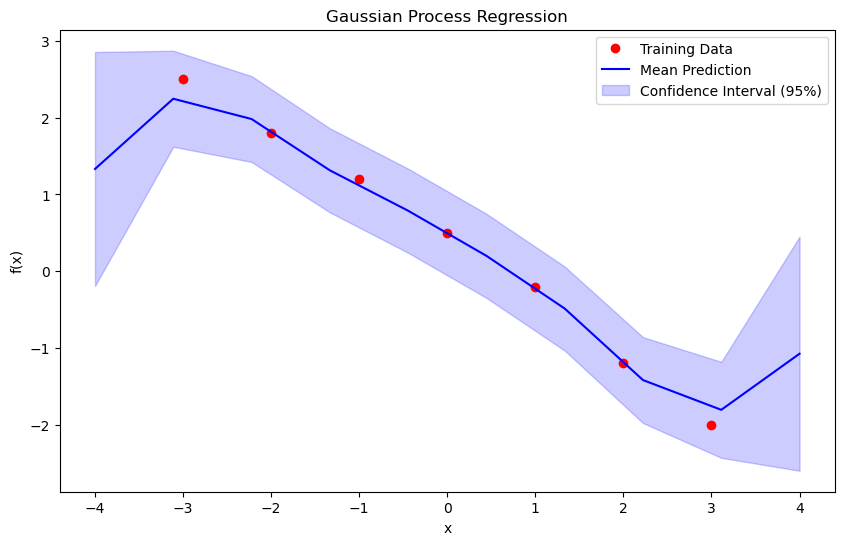

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the RBF kernel
def rbf_kernel(X1, X2, length_scale=1.0, signal_variance=1.0):
    sqdist = np.sum(X1**2, axis=1).reshape(-1, 1) + np.sum(X2**2, axis=1) - 2 * np.dot(X1, X2.T)
    return signal_variance * np.exp(-0.5 * sqdist / length_scale**2)

# Training data
X_train = np.array([[-3], [-2], [-1], [0], [1], [2], [3]])
y_train = np.array([2.5, 1.8, 1.2, 0.5, -0.2, -1.2, -2.0])

# Test points
X_test = np.linspace(-4, 4, 10).reshape(-1, 1)  # 10 test points

# Kernel and noise
length_scale = 1.0
signal_variance = 1.0
noise_variance = 0.1

# Compute the covariance matrices
K = rbf_kernel(X_train, X_train, length_scale, signal_variance)
K_s = rbf_kernel(X_train, X_test, length_scale, signal_variance)
K_ss = rbf_kernel(X_test, X_test, length_scale, signal_variance)
K_y = K + noise_variance * np.eye(len(X_train))

# Posterior mean and covariance
K_inv = np.linalg.inv(K_y)
mu_s = K_s.T @ K_inv @ y_train
cov_s = K_ss - K_s.T @ K_inv @ K_s
std_s = np.sqrt(np.diag(cov_s))

# Print the predictive values
print("Predictive Mean and 95% Confidence Interval at Test Points:")
for i, (x, mean, std) in enumerate(zip(X_test.flatten(), mu_s, std_s)):
    print(f"x = {x:.2f}: mean = {mean:.3f}, 95% CI = [{mean - 1.96 * std:.3f}, {mean + 1.96 * std:.3f}]")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, 'ro', label="Training Data")
plt.plot(X_test, mu_s, 'b-', label="Mean Prediction")
plt.fill_between(X_test.flatten(), mu_s - 1.96 * std_s, mu_s + 1.96 * std_s, color='blue', alpha=0.2, label="Confidence Interval (95%)")
plt.title("Gaussian Process Regression")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()


##### Proof of Conditional Distribution Formula

In above section, we claimed that:

$$
p(\mathbf{x}_1|\mathbf{x}_2) = \mathcal{N}(\mathbf{x}_1 | \boldsymbol{\mu}_1 + \mathbf{\Sigma}_{12}\mathbf{\Sigma}_{22}^{-1}(\mathbf{x}_2 - \boldsymbol{\mu}_2), \mathbf{\Sigma}_{11} - \mathbf{\Sigma}_{12}\mathbf{\Sigma}_{22}^{-1}\mathbf{\Sigma}_{21})
$$

We derive this result using Schur complements. Let us factor the joint $p(\mathbf{x}_1, \mathbf{x}_2)$ as follows:

$$
p(\mathbf{x}_1, \mathbf{x}_2) \propto \exp\left\{ -\frac{1}{2} \begin{pmatrix} \mathbf{x}_1 - \boldsymbol{\mu}_1 \\ \mathbf{x}_2 - \boldsymbol{\mu}_2 \end{pmatrix}^T \begin{pmatrix} \mathbf{\Sigma}_{11} & \mathbf{\Sigma}_{12} \\ \mathbf{\Sigma}_{21} & \mathbf{\Sigma}_{22} \end{pmatrix}^{-1} \begin{pmatrix} \mathbf{x}_1 - \boldsymbol{\mu}_1 \\ \mathbf{x}_2 - \boldsymbol{\mu}_2 \end{pmatrix} \right\}
$$

Schur complements:
$$
\begin{align*}
\begin{pmatrix}
E & F \\
G & H
\end{pmatrix}^{-1}
&=
\begin{pmatrix}
I & 0 \\
-H^{-1}G & I
\end{pmatrix}
\begin{pmatrix}
(M/H)^{-1} & 0 \\
0 & H^{-1}
\end{pmatrix}
\begin{pmatrix}
I & -FH^{-1} \\
0 & I
\end{pmatrix} \\
&=
\begin{pmatrix}
(M/H)^{-1} & 0 \\
-H^{-1}G(M/H)^{-1} & H^{-1}
\end{pmatrix}
\begin{pmatrix}
I & -FH^{-1} \\
0 & I
\end{pmatrix} \\
&=
\begin{pmatrix}
(M/H)^{-1} & -(M/H)^{-1}FH^{-1} \\
-H^{-1}G(M/H)^{-1} & H^{-1}+H^{-1}G(M/H)^{-1}FH^{-1}
\end{pmatrix}
\end{align*}
$$

Using Schur complements, the exponent becomes:

$$
\begin{align*}
p(x_1, x_2) &\propto \exp\left\{-\frac{1}{2}\begin{pmatrix} (x_1-\mu_1)^\top \\ (x_2-\mu_2)^\top \end{pmatrix} \begin{pmatrix} I & 0 \\ -\Sigma_{22}^{-1}\Sigma_{21} & I \end{pmatrix} \begin{pmatrix} (\Sigma/\Sigma_{22})^{-1} & 0 \\ 0 & \Sigma_{22}^{-1} \end{pmatrix} \begin{pmatrix} I & -\Sigma_{12}\Sigma_{22}^{-1} \\ 0 & I \end{pmatrix} \begin{pmatrix} (x_1-\mu_1) \\ (x_2-\mu_2) \end{pmatrix} \right\} \\
&\propto \exp\left\{-\frac{1}{2}\begin{pmatrix} (x_1-\mu_1)^\top & (x_2-\mu_2)^\top \end{pmatrix} \begin{pmatrix} (\Sigma/\Sigma_{22})^{-1} & -\Sigma_{12}\Sigma_{22}^{-1} \\ -\Sigma_{22}^{-1}\Sigma_{21} & \Sigma_{22}^{-1} \end{pmatrix} \begin{pmatrix} (x_1-\mu_1) \\ (x_2-\mu_2) \end{pmatrix} \right\} \\
&= \exp\left\{-\frac{1}{2}\left[(x_1-\mu_1)^\top (\Sigma/\Sigma_{22})^{-1} (x_1-\mu_1) - 2(x_1-\mu_1)^\top \Sigma_{12}\Sigma_{22}^{-1} (x_2-\mu_2) + (x_2-\mu_2)^\top \Sigma_{22}^{-1} (x_2-\mu_2)\right]\right\} \\
&= \exp\left\{-\frac{1}{2}(x_1-\mu_1)^\top (\Sigma/\Sigma_{22})^{-1} (x_1-\mu_1)\right\} \times \exp\left\{-\frac{1}{2}(x_2-\mu_2)^\top \Sigma_{22}^{-1} (x_2-\mu_2)\right\}
\end{align*}
$$

This is of the form:

$$
\exp(\text{quadratic form in } \mathbf{x}_1, \mathbf{x}_2) \times \exp(\text{quadratic form in } \mathbf{x}_2)
$$

Hence, we have successfully factorized the joint as:

$$
p(\mathbf{x}_1, \mathbf{x}_2) = p(\mathbf{x}_2)p(\mathbf{x}_1|\mathbf{x}_2)
$$

$$
= \mathcal{N}(\mathbf{x}_1|\boldsymbol{\mu}_{1|2}, \mathbf{\Sigma}_{1|2})\mathcal{N}(\mathbf{x}_2|\boldsymbol{\mu}_2, \mathbf{\Sigma}_{22}),
$$

where the parameters of the conditional distribution can be read off from the above equations using:

$$
\boldsymbol{\mu}_{1|2} = \boldsymbol{\mu}_1 + \mathbf{\Sigma}_{12}\mathbf{\Sigma}_{22}^{-1}(\mathbf{x}_2 - \boldsymbol{\mu}_2)
$$

$$
\mathbf{\Sigma}_{1|2} = \mathbf{\Sigma}_{11} - \mathbf{\Sigma}_{12}\mathbf{\Sigma}_{22}^{-1}\mathbf{\Sigma}_{21}
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, FloatText, Button, HBox, VBox, Output
import ipywidgets as widgets

class GaussianProcess:
    def __init__(self, lengthscale=1.0, signal_variance=1.0, noise_variance=0.1):
        self.lengthscale = lengthscale
        self.signal_variance = signal_variance
        self.noise_variance = noise_variance
        self.X_train = np.empty((0, 1))
        self.y_train = np.empty((0, 1))
        self.X_test = np.linspace(-5, 5, 100).reshape(-1, 1)
        self.K = None
        self.K_inv = None
        self.y_pred = None
        self.cov_pred = None

    def rbf_kernel(self, X1, X2):
        sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
        return self.signal_variance * np.exp(-0.5 / self.lengthscale**2 * sqdist)

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.K = self.rbf_kernel(X_train, X_train) + self.noise_variance * np.eye(len(X_train))
        self.K_inv = np.linalg.inv(self.K)

    def predict(self):
        K_s = self.rbf_kernel(self.X_train, self.X_test)
        K_ss = self.rbf_kernel(self.X_test, self.X_test) + 1e-8 * np.eye(len(self.X_test))
        mu_s = K_s.T.dot(self.K_inv).dot(self.y_train).flatten()
        cov_s = K_ss - K_s.T.dot(self.K_inv).dot(K_s)
        self.y_pred = mu_s
        self.cov_pred = cov_s

    def add_data_point(self, x, y):
        x = np.array([[x]])
        y = np.array([[y]])
        self.X_train = np.vstack((self.X_train, x))
        self.y_train = np.vstack((self.y_train, y))
        self.fit(self.X_train, self.y_train)
        self.predict()

    def plot(self, output_widget):
        with output_widget:
            output_widget.clear_output(wait=True)
            plt.figure(figsize=(10, 5))
            plt.plot(self.X_test, self.y_pred, 'b-', label='Mean')
            plt.fill_between(self.X_test.flatten(), self.y_pred - 1.96 * np.sqrt(np.diag(self.cov_pred)),
                             self.y_pred + 1.96 * np.sqrt(np.diag(self.cov_pred)), alpha=0.2, color='blue')
            plt.scatter(self.X_train, self.y_train, color='red', label='Data points')
            plt.xlabel('X')
            plt.ylabel('f(X)')
            plt.legend()
            plt.show()

def interactive_gp(lengthscale, signal, noise):
    global gp
    gp.lengthscale = lengthscale
    gp.signal_variance = signal
    gp.noise_variance = noise
    gp.fit(gp.X_train, gp.y_train)
    gp.predict()
    gp.plot(output)

def add_point(b):
    x = x_input.value
    y = y_input.value
    gp.add_data_point(x, y)
    gp.plot(output)

lengthscale_slider = FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='Lengthscale')
signal_slider = FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='Signal')
noise_slider = FloatSlider(min=0, max=1.0, step=0.01, value=0.1, description='Noise')

x_input = FloatText(value=0.0, description='X:')
y_input = FloatText(value=0.0, description='Y:')
add_button = Button(description='Add Point')

add_button.on_click(add_point)

controls = VBox([HBox([x_input, y_input, add_button])])
output = Output()

display(controls, output)

gp = GaussianProcess()
gp.fit(gp.X_train, gp.y_train)
gp.predict()
gp.plot(output)

interact(interactive_gp, lengthscale=lengthscale_slider, signal=signal_slider, noise=noise_slider)


Output()

interactive(children=(FloatSlider(value=1.0, description='Lengthscale', max=5.0, min=0.1), FloatSlider(value=1…

<function __main__.interactive_gp(lengthscale, signal, noise)>

## Key Scenarios and Insights in Gaussian Processes

Consider the following code as a general function space GP code 

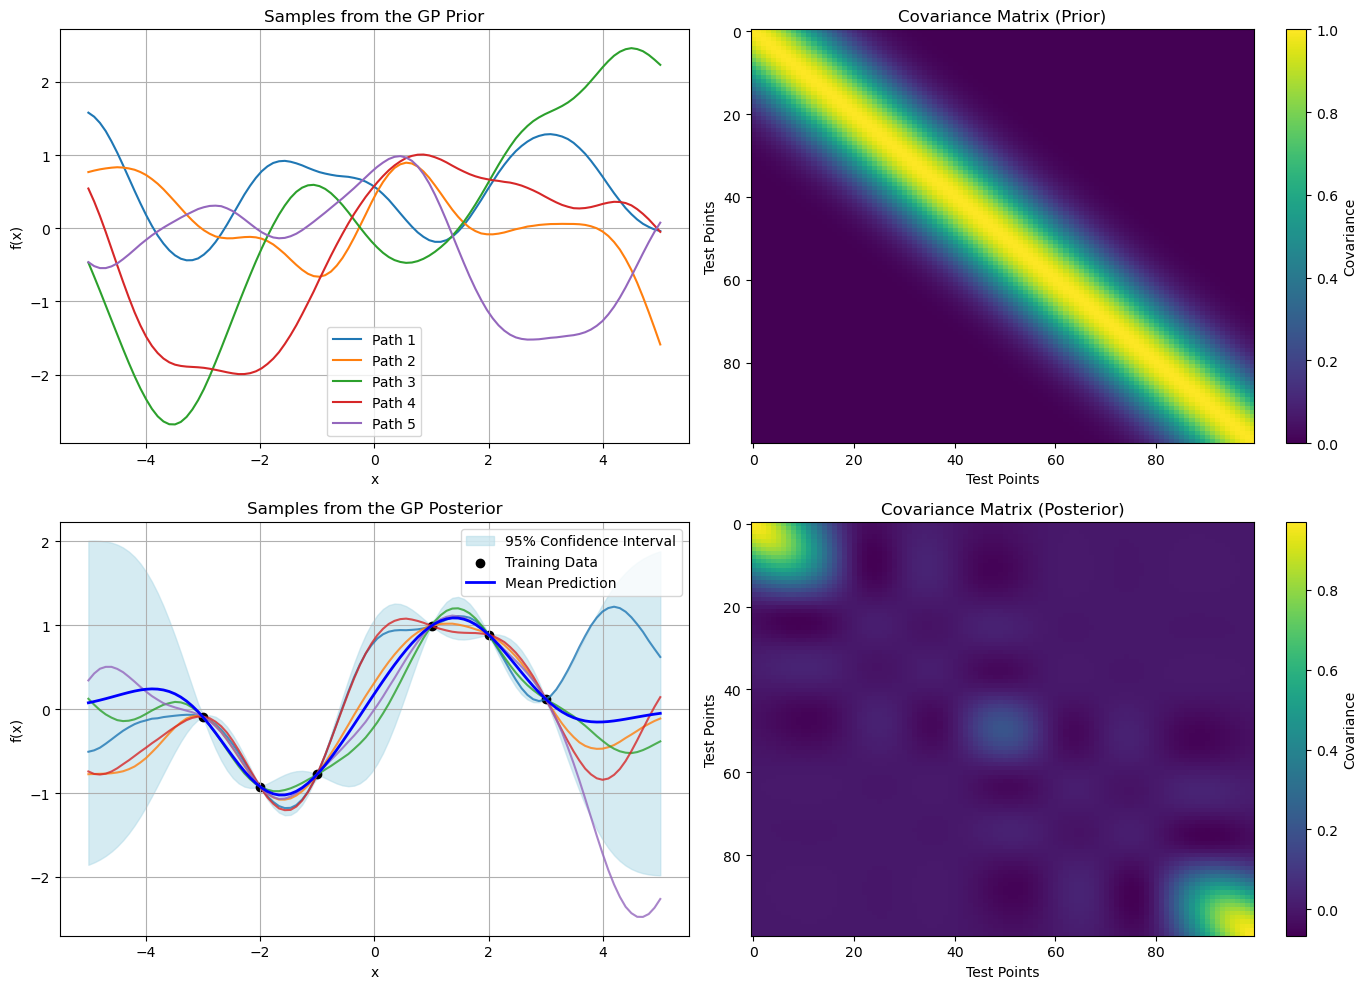

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import cholesky

# RBF (Gaussian) kernel function
def rbf_kernel(x, x_prime, length_scale=1.0, variance=1.0):
    """Radial Basis Function (RBF) kernel."""
    x = np.atleast_2d(x)
    x_prime = np.atleast_2d(x_prime)
    dist = np.sum((x[:, None, :] - x_prime[None, :, :]) ** 2, axis=2)
    return variance * np.exp(-0.5 * dist / length_scale**2)

# GP prior sampling
def gp_prior(kernel_func, X, n_samples=3, length_scale=1.0, variance=1.0):
    """Sample from a GP prior."""
    X = np.atleast_2d(X)
    K = kernel_func(X, X, length_scale, variance)
    K += 1e-6 * np.eye(len(X))  # Add jitter for numerical stability
    L = cholesky(K, lower=True)
    f_prior = np.dot(L, np.random.randn(len(X), n_samples))
    return f_prior, K

# GP posterior computation
def gp_posterior(kernel_func, X_train, y_train, X_test, length_scale=1.0, variance=1.0):
    """Compute the GP posterior mean and covariance."""
    X_train = np.atleast_2d(X_train)
    X_test = np.atleast_2d(X_test)
    
    # Compute covariance matrices
    K = kernel_func(X_train, X_train, length_scale, variance) + 1e-6 * np.eye(len(X_train))
    K_s = kernel_func(X_train, X_test, length_scale, variance)
    K_ss = kernel_func(X_test, X_test, length_scale, variance) + 1e-6 * np.eye(len(X_test))

    # Compute the posterior mean and covariance
    K_inv = np.linalg.inv(K)
    mu_post = K_s.T @ K_inv @ y_train
    cov_post = K_ss - K_s.T @ K_inv @ K_s

    return mu_post, cov_post, K_ss

# Generate data
np.random.seed(42)
X_train = np.array([-3, -2, -1, 1, 2, 3])[:, None]
y_train = np.sin(X_train).ravel() + 0.1 * np.random.randn(len(X_train))
X_test = np.linspace(-5, 5, 100)[:, None]

# Sample from the GP prior
f_prior, K_prior = gp_prior(rbf_kernel, X_test, n_samples=5, length_scale=1.0, variance=1.0)

# Compute the GP posterior
mu_post, cov_post, K_ss = gp_posterior(rbf_kernel, X_train, y_train, X_test, length_scale=1.0, variance=1.0)

# Sample from the GP posterior
L_post = cholesky(cov_post + 1e-6 * np.eye(len(cov_post)), lower=True)
f_post = mu_post[:, None] + np.dot(L_post, np.random.randn(len(X_test), 5))

# Plot the GP prior and covariance
plt.figure(figsize=(14, 10))

# GP Prior
plt.subplot(2, 2, 1)
for i in range(f_prior.shape[1]):
    plt.plot(X_test, f_prior[:, i], label=f"Path {i+1}")
plt.title("Samples from the GP Prior")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 2)
plt.imshow(K_prior, cmap="viridis", interpolation='nearest', aspect='auto')
plt.colorbar(label="Covariance")
plt.title("Covariance Matrix (Prior)")
plt.xlabel("Test Points")
plt.ylabel("Test Points")

# GP Posterior
plt.subplot(2, 2, 3)
plt.fill_between(
    X_test.ravel(),
    mu_post - 1.96 * np.sqrt(np.diag(cov_post)),
    mu_post + 1.96 * np.sqrt(np.diag(cov_post)),
    color="lightblue",
    alpha=0.5,
    label="95% Confidence Interval",
)
for i in range(f_post.shape[1]):
    plt.plot(X_test, f_post[:, i], lw=1.5, alpha=0.8)
plt.scatter(X_train, y_train, color="black", label="Training Data")
plt.plot(X_test, mu_post, "blue", lw=2, label="Mean Prediction")
plt.title("Samples from the GP Posterior")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 4)
plt.imshow(cov_post, cmap="viridis", interpolation='nearest', aspect='auto')
plt.colorbar(label="Covariance")
plt.title("Covariance Matrix (Posterior)")
plt.xlabel("Test Points")
plt.ylabel("Test Points")

plt.tight_layout()
plt.show()

### Secenario 1: No Data (GP Prior)

**Question:** We want to know that what governs the behavior of a Gaussian Process when no data is available, and how does the prior impact the predictions?

**Answer:** When there is no data, the *GP prior* governs the behavior. The mean function (commonly set to 0) and the kernel (covariance function) dictate the GP's behavior. The kernel's hyperparameters, such as length scale and signal variance, play a critical role in shaping the prior.

  - Effect: The GP will represent a random function drawn from the prior. Without observations, it is entirely governed by the kernel, exhibiting smoothness or roughness as per the kernel's configuration.

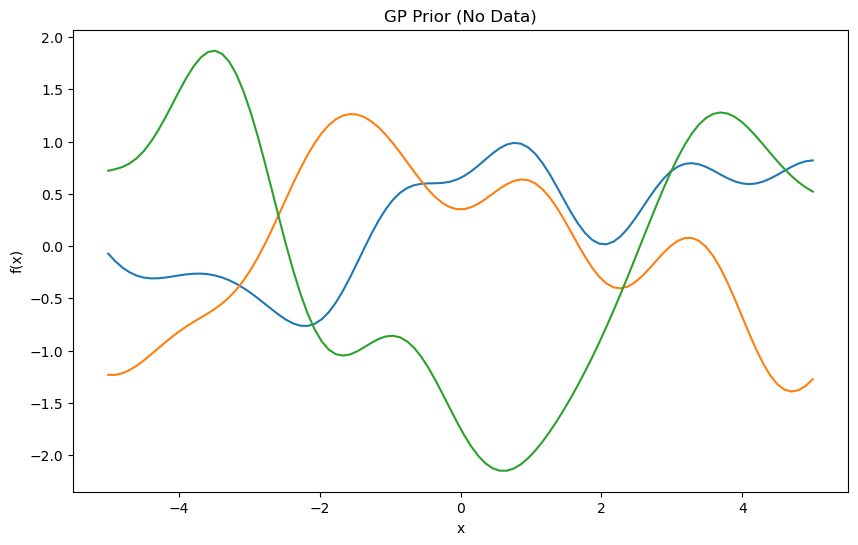

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the RBF kernel
def rbf_kernel(X1, X2, length_scale=1.0, signal_variance=1.0):
    sqdist = np.sum(X1**2, axis=1).reshape(-1, 1) + np.sum(X2**2, axis=1) - 2 * np.dot(X1, X2.T)
    return signal_variance * np.exp(-0.5 * sqdist / length_scale**2)

# Prior with no data
X_test = np.linspace(-5, 5, 100).reshape(-1, 1)
length_scale = 1.0
signal_variance = 1.0

K_ss = rbf_kernel(X_test, X_test, length_scale, signal_variance)
samples = np.random.multivariate_normal(np.zeros(X_test.shape[0]), K_ss, 3)

plt.figure(figsize=(10, 6))
plt.plot(X_test, samples.T)
plt.title("GP Prior (No Data)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

#### Explanation

- When no meaningful training data is provided (or only a single dummy data point), the GP prior dictates the behavior.
- The kernel parameters (e.g., length scale, signal variance) define the shape of the prior mean and covariance.
- The GP has high uncertainty, as reflected by wide confidence intervals.

### Scenario 2: Similarity to One Training Point

**Question:** How does a Gaussian Process behave when a test point is highly similar to one of the training points, and what are the implications for the predictive mean and variance?

**Answer:** If a test point is similar to a single training point:
 - Covariance: It will show a strong dependency on that training point and negligible correlations with other points. The covariance matrix reflects the kernel's values between the test point and training data.
 - Mean: The predictive mean for the test point will closely align with the observed value at the similar training point.

In [18]:
# One similar training point
X_train = np.array([[-3], [3]])
y_train = np.array([2.0, -1.0])

X_test = np.array([[3.0]])  # Test point similar to one training point

gp = GaussianProcess(lengthscale=1.0, signal_variance=1.0, noise_variance=0.1)
gp.fit(X_train, y_train)
gp.predict()

print(f"Predictive mean at {X_test[0, 0]}: {gp.y_pred[0]:.3f}")
print(f"Predictive covariance at {X_test[0, 0]}: {gp.cov_pred[0, 0]:.3f}")



Predictive mean at 3.0: 0.246
Predictive covariance at 3.0: 0.983


#### Explanation
- The test point’s prediction is heavily influenced by the nearest similar training point due to the kernel's locality.
- The mean aligns closely with the nearby training data, and the covariance reduces near similar points while remaining high elsewhere.

### Scenario 3: Outlier Data

**Question:** What happens to the predictive mean and uncertainty of a Gaussian Process when an outlier exists in the training data?

**Answer:** Outliers significantly influence the GP:
 - Effect on Mean: The predictive mean may deviate, especially near the outlier.
 - Effect on Covariance: Predictive uncertainty increases around the outlier as the model tries to reconcile the discrepancy.



In [25]:
X_train = np.array([[-3], [0], [3]])
y_train = np.array([2.0, 10.0, -2.0])  # Outlier at 0

gp = GaussianProcess(lengthscale=1.0, signal_variance=1.0, noise_variance=0.1)
gp.fit(X_train, y_train)
gp.predict()

gp.plot(output)

#### Explanation

- Outliers significantly distort the GP mean, pulling it towards the outlier.
- The covariance increases around the outlier due to uncertainty about whether to trust the point.

### Scenario 4: Dense Noisy Data

**Question:** How does observational noise affect the predictions and uncertainties of a Gaussian Process when the training dataset is dense?

**Answer:** 
- Effect: Observational noise increases uncertainty in predictions, reflected as higher variance in regions with dense noisy data.
- Reason: With dense data, the kernel matrix grows, and inversion for computing predictions becomes sensitive to noise. The noise term (${\sigma_n}^2 I$) added to the kernel dominates in regions of high data density.

In [17]:
X_train = np.linspace(-5, 5, 50).reshape(-1, 1)
y_train = np.sin(X_train).flatten() + np.random.normal(0, 0.5, X_train.shape[0])  # Adding noise

gp = GaussianProcess(lengthscale=1.0, signal_variance=1.0, noise_variance=0.5)
gp.fit(X_train, y_train)
gp.predict()

gp.plot(output)

#### Explanation
- With a large amount of noisy data, the GP balances fitting the data and modeling uncertainty.
- The effective noise variance increases because the GP assumes part of the variability is due to observation noise.

### General Overview

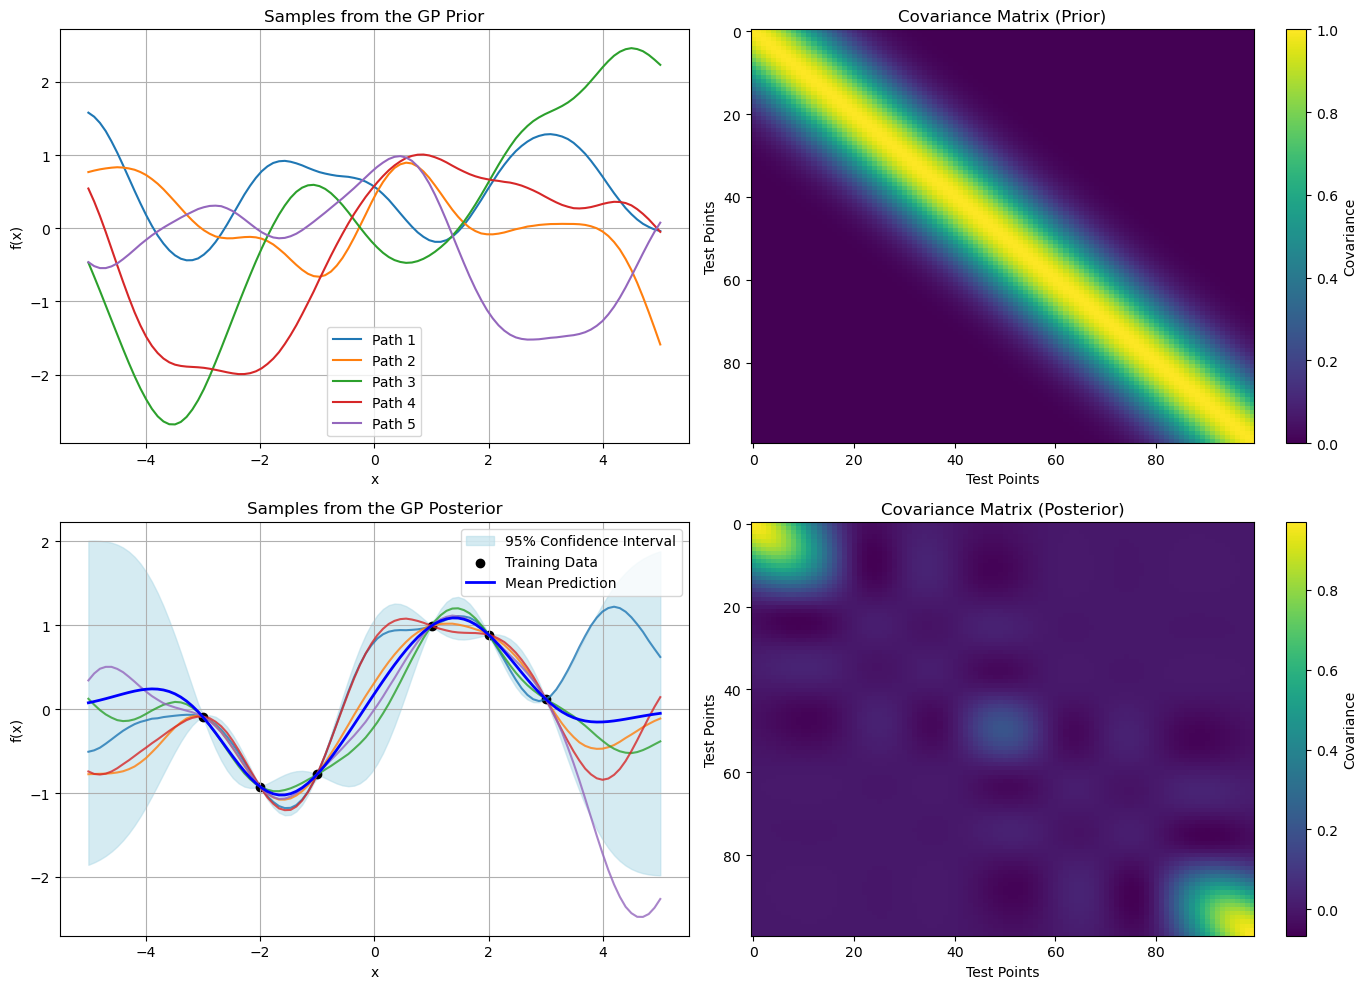

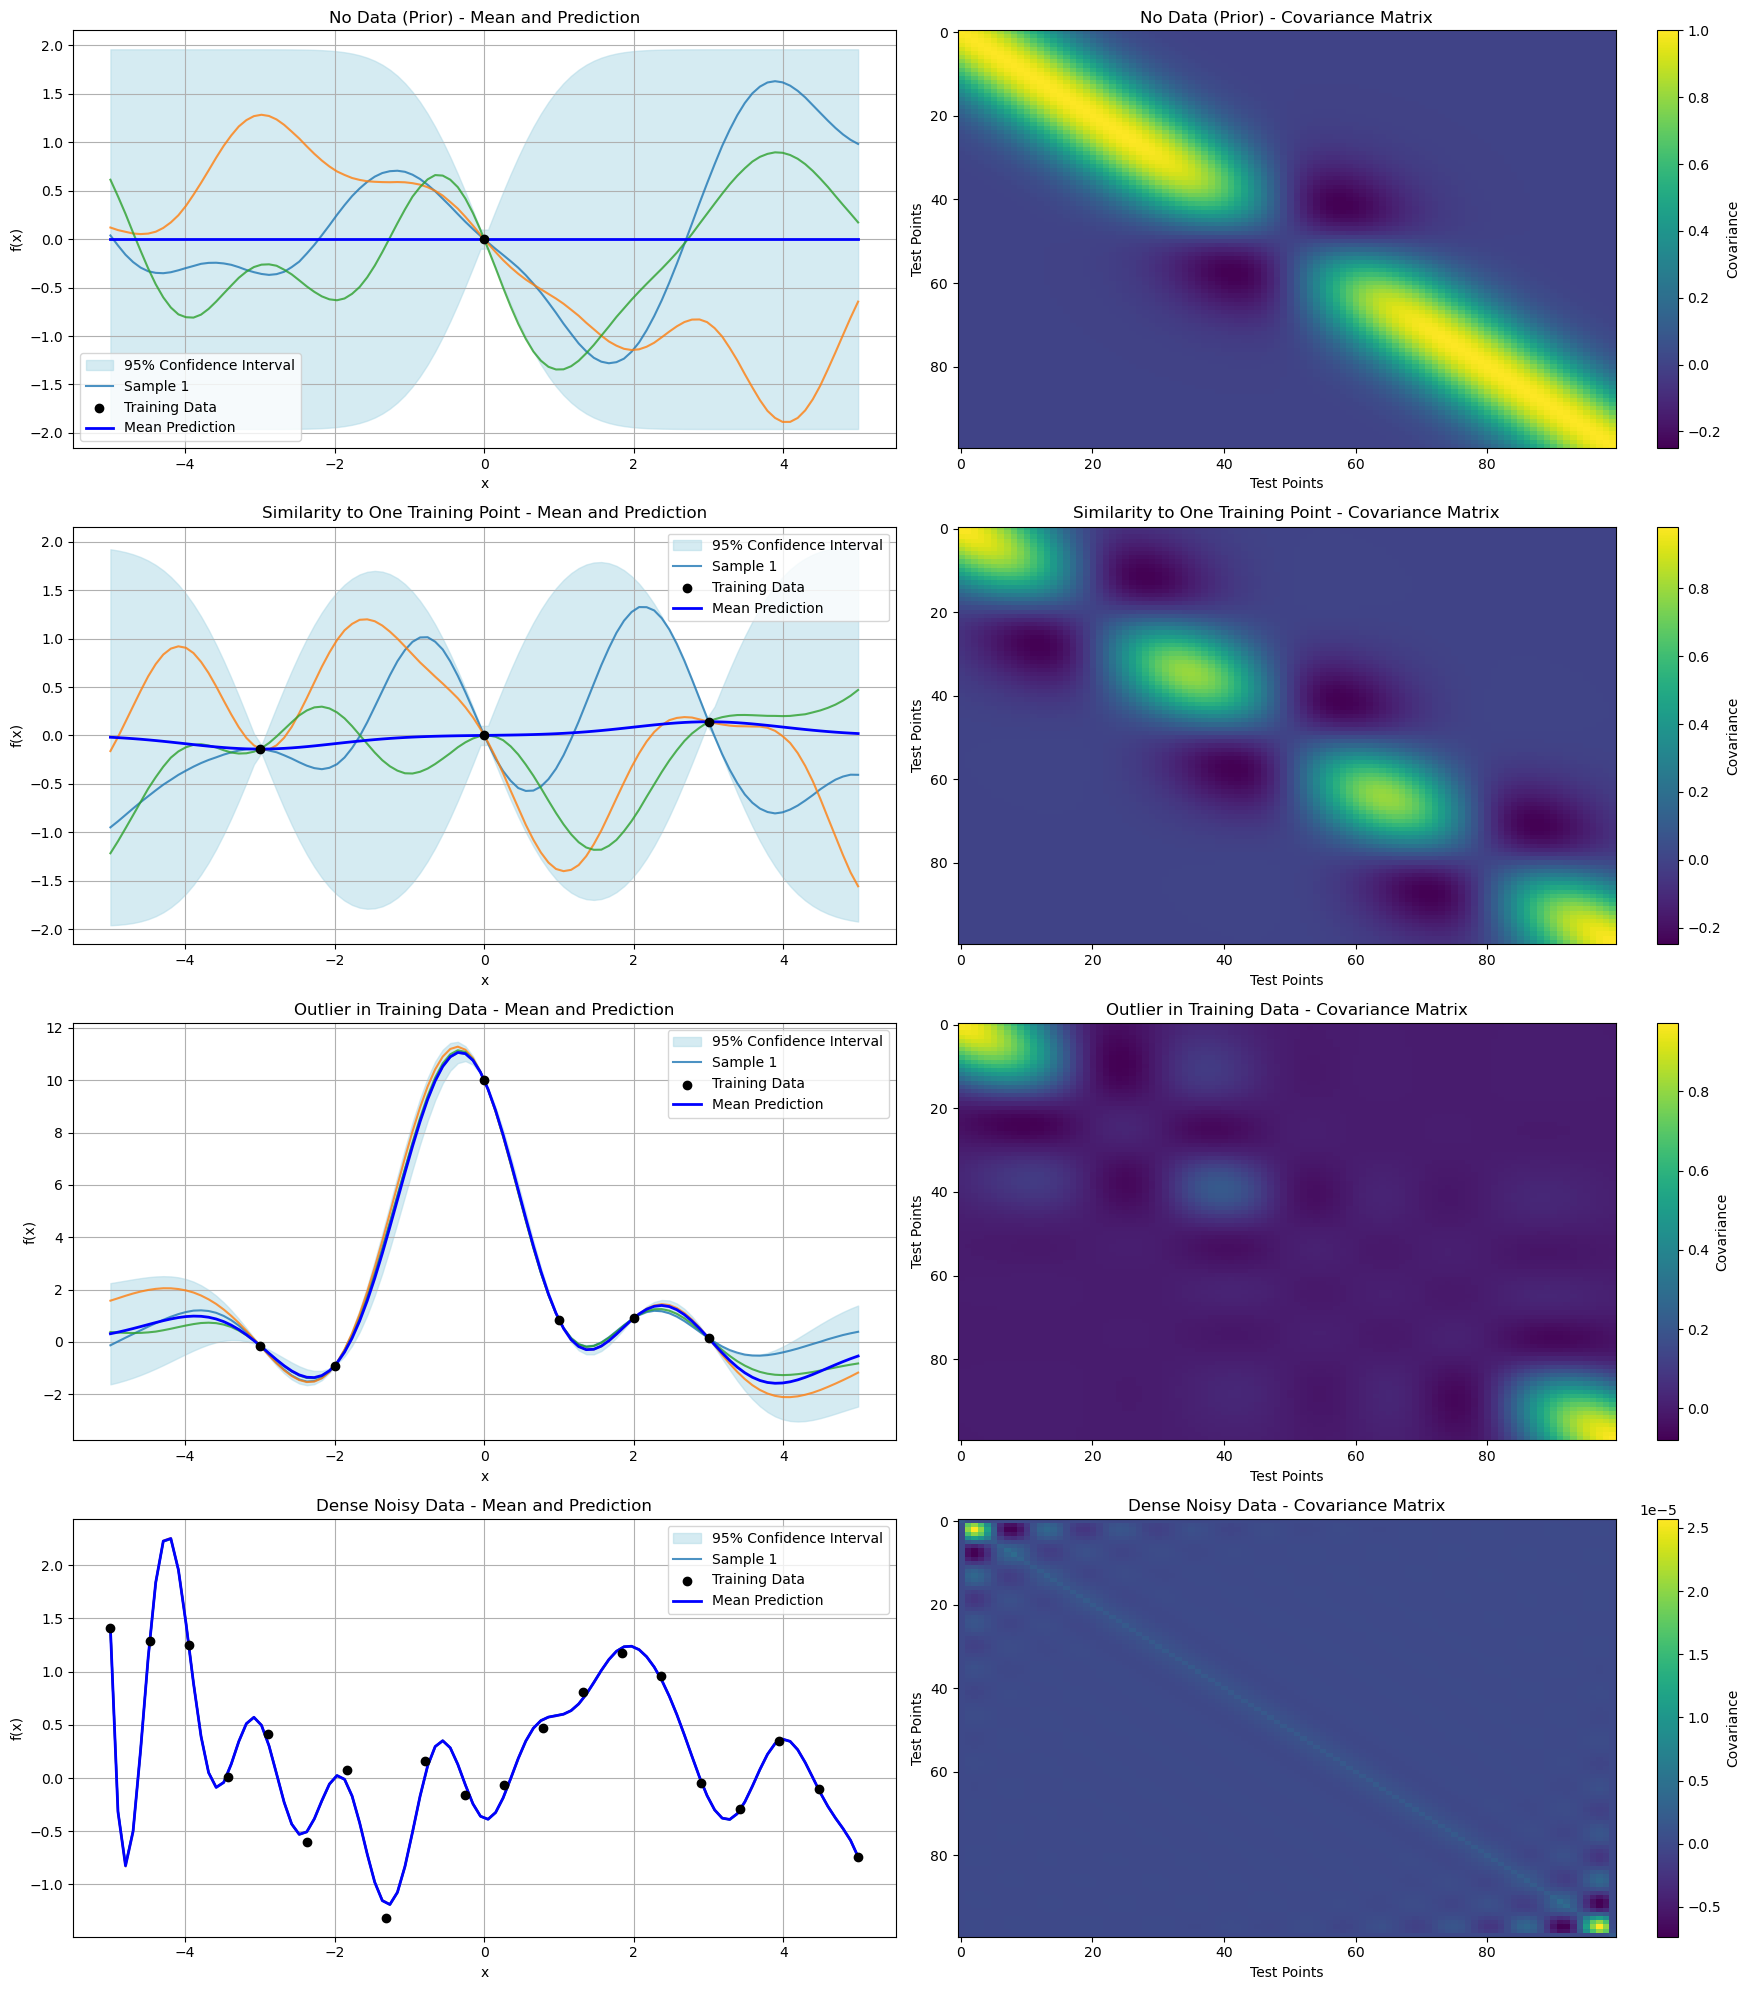

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import cholesky

# RBF (Gaussian) kernel function
def rbf_kernel(x, x_prime, length_scale=1.0, variance=1.0):
    """Radial Basis Function (RBF) kernel."""
    x = np.atleast_2d(x)
    x_prime = np.atleast_2d(x_prime)
    dist = np.sum((x[:, None, :] - x_prime[None, :, :]) ** 2, axis=2)
    return variance * np.exp(-0.5 * dist / length_scale**2)

# GP prior sampling
def gp_prior(kernel_func, X, n_samples=3, length_scale=1.0, variance=1.0):
    """Sample from a GP prior."""
    X = np.atleast_2d(X)
    K = kernel_func(X, X, length_scale, variance)
    K += 1e-6 * np.eye(len(X))  # Add jitter for numerical stability
    L = cholesky(K, lower=True)
    f_prior = np.dot(L, np.random.randn(len(X), n_samples))
    return f_prior, K

# GP posterior computation
def gp_posterior(kernel_func, X_train, y_train, X_test, length_scale=1.0, variance=1.0):
    """Compute the GP posterior mean and covariance."""
    X_train = np.atleast_2d(X_train)
    X_test = np.atleast_2d(X_test)
    
    # Compute covariance matrices
    K = kernel_func(X_train, X_train, length_scale, variance) + 1e-6 * np.eye(len(X_train))
    K_s = kernel_func(X_train, X_test, length_scale, variance)
    K_ss = kernel_func(X_test, X_test, length_scale, variance) + 1e-6 * np.eye(len(X_test))

    # Compute the posterior mean and covariance
    K_inv = np.linalg.inv(K)
    mu_post = K_s.T @ K_inv @ y_train
    cov_post = K_ss - K_s.T @ K_inv @ K_s

    return mu_post, cov_post, K_ss

# Generate data
np.random.seed(42)
X_train = np.array([-3, -2, -1, 1, 2, 3])[:, None]
y_train = np.sin(X_train).ravel() + 0.1 * np.random.randn(len(X_train))
X_test = np.linspace(-5, 5, 100)[:, None]

# Sample from the GP prior
f_prior, K_prior = gp_prior(rbf_kernel, X_test, n_samples=5, length_scale=1.0, variance=1.0)

# Compute the GP posterior
mu_post, cov_post, K_ss = gp_posterior(rbf_kernel, X_train, y_train, X_test, length_scale=1.0, variance=1.0)

# Sample from the GP posterior
L_post = cholesky(cov_post + 1e-6 * np.eye(len(cov_post)), lower=True)
f_post = mu_post[:, None] + np.dot(L_post, np.random.randn(len(X_test), 5))

# Plot the GP prior and covariance
plt.figure(figsize=(14, 10))

# GP Prior
plt.subplot(2, 2, 1)
for i in range(f_prior.shape[1]):
    plt.plot(X_test, f_prior[:, i], label=f"Path {i+1}")
plt.title("Samples from the GP Prior")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 2)
plt.imshow(K_prior, cmap="viridis", interpolation='nearest', aspect='auto')
plt.colorbar(label="Covariance")
plt.title("Covariance Matrix (Prior)")
plt.xlabel("Test Points")
plt.ylabel("Test Points")

# GP Posterior
plt.subplot(2, 2, 3)
plt.fill_between(
    X_test.ravel(),
    mu_post - 1.96 * np.sqrt(np.diag(cov_post)),
    mu_post + 1.96 * np.sqrt(np.diag(cov_post)),
    color="lightblue",
    alpha=0.5,
    label="95% Confidence Interval",
)
for i in range(f_post.shape[1]):
    plt.plot(X_test, f_post[:, i], lw=1.5, alpha=0.8)
plt.scatter(X_train, y_train, color="black", label="Training Data")
plt.plot(X_test, mu_post, "blue", lw=2, label="Mean Prediction")
plt.title("Samples from the GP Posterior")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 4)
plt.imshow(cov_post, cmap="viridis", interpolation='nearest', aspect='auto')
plt.colorbar(label="Covariance")
plt.title("Covariance Matrix (Posterior)")
plt.xlabel("Test Points")
plt.ylabel("Test Points")

plt.tight_layout()
plt.show()
###########################################
# Updated function to include covariance plots for each scenario
def plot_gp_scenarios_with_covariance(X_train_scenarios, y_train_scenarios, scenario_titles, X_test):
    """Plot GP predictions and covariance matrices for different training data scenarios."""
    plt.figure(figsize=(18, 20))

    for i, (X_train, y_train, title) in enumerate(zip(X_train_scenarios, y_train_scenarios, scenario_titles)):
        # Compute GP posterior for each scenario
        mu_post, cov_post, _ = gp_posterior(rbf_kernel, X_train, y_train, X_test, length_scale=1.0, variance=1.0)
        L_post = cholesky(cov_post + 1e-6 * np.eye(len(cov_post)), lower=True)
        f_post = mu_post[:, None] + np.dot(L_post, np.random.randn(len(X_test), 3))

        # Plot the GP posterior mean and confidence interval
        plt.subplot(4, 2, 2 * i + 1)
        plt.fill_between(
            X_test.ravel(),
            mu_post - 1.96 * np.sqrt(np.diag(cov_post)),
            mu_post + 1.96 * np.sqrt(np.diag(cov_post)),
            color="lightblue",
            alpha=0.5,
            label="95% Confidence Interval",
        )
        for j in range(f_post.shape[1]):
            plt.plot(X_test, f_post[:, j], lw=1.5, alpha=0.8, label=f"Sample {j + 1}" if j == 0 else None)
        plt.scatter(X_train, y_train, color="black", label="Training Data", zorder=5)
        plt.plot(X_test, mu_post, "blue", lw=2, label="Mean Prediction")
        plt.title(f"{title} - Mean and Prediction")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.grid(True)
        plt.legend()

        # Plot the covariance matrix
        plt.subplot(4, 2, 2 * i + 2)
        plt.imshow(cov_post, cmap="viridis", interpolation='nearest', aspect='auto')
        plt.colorbar(label="Covariance")
        plt.title(f"{title} - Covariance Matrix")
        plt.xlabel("Test Points")
        plt.ylabel("Test Points")

    plt.tight_layout()
    plt.show()

# Define scenarios
X_train_no_data = np.array([[0]])  # No data scenario (dummy single training point)
y_train_no_data = np.array([0])

X_train_similar = np.array([-3, 0, 3])[:, None]  # Test point similar to one training point
y_train_similar = np.sin(X_train_similar).ravel()

X_train_outlier = np.array([-3, -2, 0, 1, 2, 3])[:, None]  # Outlier scenario
y_train_outlier = np.array([np.sin(-3), np.sin(-2), 10, np.sin(1), np.sin(2), np.sin(3)])

X_train_dense = np.linspace(-5, 5, 20).reshape(-1, 1)  # Dense noisy data
y_train_dense = np.sin(X_train_dense).flatten() + np.random.normal(0, 0.5, len(X_train_dense))

# Collect training data and titles
X_train_scenarios = [
    X_train_no_data,
    X_train_similar,
    X_train_outlier,
    X_train_dense,
]
y_train_scenarios = [
    y_train_no_data,
    y_train_similar,
    y_train_outlier,
    y_train_dense,
]
scenario_titles = [
    "No Data (Prior)",
    "Similarity to One Training Point",
    "Outlier in Training Data",
    "Dense Noisy Data",
]


# Plot all scenarios with covariance
plot_gp_scenarios_with_covariance(X_train_scenarios, y_train_scenarios, scenario_titles, X_test)

#### Scenario Overview

1. No Data (Prior):

    - Mean: Flat with high uncertainty (wide confidence intervals) due to lack of meaningful training data.
    - Covariance: Uniformly high correlations between all test points, reflecting the prior assumption.

2. Similarity to One Training Point:

    - Mean: Closely follows the single nearby training point, reducing uncertainty near it.
    - Covariance: Reduced variance around the training point, but higher correlations elsewhere.

3. Outlier in Training Data:

    - Mean: Distorted significantly near the outlier, increasing uncertainty.
    - Covariance: Large variance around the outlier region, reflecting less confidence.
    
4. Dense Noisy Data:

    - Mean: Tracks the noisy trend of the training data, balancing fit and smoothness.
    - Covariance: Overall reduced due to dense data, but still influenced by noise.

##### Key Insights
- The covariance matrices provide a clear picture of uncertainty and correlation between test points.
- The mean predictions adapt dynamically to the training data, demonstrating GP's flexibility.

### Numerical Example

We now demonstrate step-by-step computations of mean and covariance for a Gaussian Process for different scenarios at a test point. 

In these scenarios we consider $ X_{test} = [0] $

#### Scenario 1: No Data (Prior)

##### Training Data:

$ X = \begin{bmatrix} 0 \end{bmatrix} $

##### Training Targets:

$ y = \begin{bmatrix} 0 \end{bmatrix} $

##### Training Covariance Matrix $ K $:

$$
K = \begin{bmatrix} 1.000001 \end{bmatrix}
$$

##### Cross Covariance Matrix $ K_* $:

$$
K_* = \begin{bmatrix} 1.0 \end{bmatrix}
$$

##### Test Covariance Matrix $ K_{**} $:

$$
K_{**} = \begin{bmatrix} 1.000001 \end{bmatrix}
$$

##### Mean at Test Point:

$$
\mu_* = 0.0
$$

##### Variance at Test Point:

$$
\sigma_*^2 = 1.000000000139778
$$


#### Scenario 2: Similarity to One Training Point

##### Training Data:

$ X = \begin{bmatrix} -3 \\ 0 \\ 3 \end{bmatrix} $

##### Training Targets:

$ y = \begin{bmatrix} -0.1411 \\ 0.0 \\ 0.1411 \end{bmatrix} $

##### Training Covariance Matrix $ K $:

$$
K = \begin{bmatrix}
1.000001 & 0.011109 & 0.00012341 \\
0.011109 & 1.000001 & 0.011109 \\
0.00012341 & 0.011109 & 1.000001
\end{bmatrix}
$$

##### Cross Covariance Matrix $ K_* $:

$$
K_* = \begin{bmatrix} 0.011109 \\ 1.0 \\ 0.011109 \end{bmatrix}
$$

##### Test Covariance Matrix $ K_{**} $:

$$
K_{**} = \begin{bmatrix} 1.000001 \end{bmatrix}
$$

##### Mean at Test Point:

$$
\mu_* = 0.0
$$

##### Variance at Test Point:

$$
\sigma_*^2 = 9.999889812758412 \times 10^{-7}
$$


#### Scenario 3: Outlier in Training Data

##### Training Data:

$ X = \begin{bmatrix} -3 \\ -2 \\ 0 \\ 1 \\ 2 \\ 3 \end{bmatrix} $

##### Training Targets:

$ y = \begin{bmatrix} -0.1411 \\ -0.9093 \\ 10.0 \\ 0.8415 \\ 0.9093 \\ 0.1411 \end{bmatrix} $

##### Training Covariance Matrix $ K $:

$$
K = \begin{bmatrix}
1.000001 & 0.606531 & 0.011109 & 0.00033546 & 0.0000037267 & 0.00000012341 \\
0.606531 & 1.000001 & 0.135335 & 0.011109 & 0.00033546 & 0.0000037267 \\
0.011109 & 0.135335 & 1.000001 & 0.135335 & 0.011109 & 0.00033546 \\
0.00033546 & 0.011109 & 0.135335 & 1.000001 & 0.135335 & 0.011109 \\
0.0000037267 & 0.00033546 & 0.011109 & 0.135335 & 1.000001 & 0.606531 \\
0.00000012341 & 0.0000037267 & 0.00033546 & 0.011109 & 0.606531 & 1.000001
\end{bmatrix}
$$

##### Cross Covariance Matrix $ K_* $:

$$
K_* = \begin{bmatrix} 0.011109 \\ 0.135335 \\ 1.0 \\ 0.135335 \\ 0.011109 \\ 0.00033546 \end{bmatrix}
$$

##### Test Covariance Matrix $ K_{**} $:

$$
K_{**} = \begin{bmatrix} 1.000001 \end{bmatrix}
$$

##### Mean at Test Point:

$$
\mu_* = 0.1797
$$

##### Variance at Test Point:

$$
\sigma_*^2 = 9.967806621528498 \times 10^{-7}
$$


#### Scenario 4: Dense Noisy Data

##### Training Data:

$ X = \begin{bmatrix} -5.0 \\ -4.4737 \\ \vdots \\ 5.0 \end{bmatrix} $

##### Training Targets:

$ y = \begin{bmatrix} -1.4015 \\ -1.0347 \\ \vdots \\ 0.1788 \end{bmatrix} $

##### Training Covariance Matrix $ K $:

$$
K = \text{(20x20 matrix)}
$$

##### Cross Covariance Matrix $ K_* $:

$$
K_* = \text{(20x1 matrix)}
$$

##### Test Covariance Matrix $ K_{**} $:

$$
K_{**} = \begin{bmatrix} 1.000001 \end{bmatrix}
$$

##### Mean at Test Point:

$$
\mu_* = -0.0514
$$

##### Variance at Test Point:

$$
\sigma_*^2 = 0.0126
$$
